<a href="https://colab.research.google.com/github/julien-zhao/M2_Projet_ML/blob/main/ProjetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJET MACHINE LEARNING**




---
##**Membres de l'équipe**
*    DAI Elodie

*    ZHAO Julien

*    ZHAO Wenbo

*    CHENG Wenxin

*    BENKHANOUS Salaheddine

---
##**Modalités**
####**Deadline**
*   Maximum avant le 19 janvier 2025 à 20h.

---
####**Notation**
*   Un point pour la qualité de l'argumentation.
*   Un point pour la rigueur méthodologique.
*   Un point pour la performance si la RMSE finale obtenu est inférieure à 1.5 pour un dataset de test composée des 20% date les plus récentes.

---
####**Description du Dataset**

*  Le dataset représente les données de marché pour l'indice VKOSPI, qui est l'équivalent coréen de l'indice de volatilité implicite VIX aux États-Unis. Chaque ligne du dataset correspond à un jour de trading, excluant les week-ends et les jours fériés. Les colonnes du dataset fournissent diverses informations sur les transactions et les positions des options et des futures sur l'indice KOSPI200, qui est l'actif sous-jacent du VKOSPI.

---
###**Description des Colonnes**
*   Date : *La date du jour de trading.*
*   VKOSPI : *La valeur de l'indice de volatilité implicite VKOSPI pour ce jour.*
*   KOSPI200 : *La valeur de l'indice KOSPI200 pour ce jour.*
*   Open_interest : *Le nombre total de contrats d'options ouverts (non réglés) pour ce jour.*
*   For_KOSPI_Netbuying_Amount : *Le montant net acheté par les étrangers pour l'indice KOSPI200, calculé comme (Prix) * (Quantité).*
*   For_Future_Netbuying_Quantity : *La quantité nette achetée par les étrangers pour les futures de KOSPI200.*
*   For_Call_Netbuying_Quantity : *La quantité nette achetée par les étrangers pour les options d'achat (call) de KOSPI200.*
*   For_Put_Netbuying_Quantity : *La quantité nette achetée par les étrangers pour les options de vente (put) de KOSPI200.*
*   Indiv_Future_Netbuying_Quantity : *La quantité nette achetée par les individus pour les futures de KOSPI200.*
*   Indiv_Call_Netbuying_Quantity : *La quantité nette achetée par les individus pour les options d'achat (call) de KOSPI200.*
*   Indiv_Put_Netbuying_Quantity : *La quantité nette achetée par les individus pour les options de vente (put) de KOSPI200.*
*   PCRatio : *Le ratio Put-Call, qui est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call).*
*   Day_till_expiration : *Le nombre de jours restants jusqu'à la date d'expiration des options.*

---
###**Notions financières**
*   Le KOSPI200 est un indice boursier composé des 200 plus grandes entreprises cotées en Corée du Sud. Il est souvent considéré comme un indicateur de la performance du marché boursier coréen. Un indice similaire au S&P500 pour les États-Unis, l’Euro STOXX 50 l’Europe ou le Nikkei 225 pour le Japon.
*   La volatilité implicite est une mesure de la volatilité future attendue d'un actif sous-jacent, dérivée des prix des options. Le VKOSPI est l'indice de volatilité implicite pour le marché coréen, comparable au VIX pour le marché américain, VSTOXX pour le marché européen ou VNKY pour le Japon.
*   L'open interest représente le nombre total de contrats d'options ouverts (non réglés) à une date donnée. C'est une mesure de l'activité de trading et de l'intérêt des investisseurs pour les options.
*   Le net buying amount ou quantity représente la différence entre les achats et les ventes effectués par un groupe spécifique (étrangers ou individus) pour un actif donné (KOSPI200, futures, options d'achat, options de vente). Un net buying positif indique que les achats dépassent les ventes.
*   Le ratio Put-Call est le rapport entre le volume des options de vente (put) et le volume des options d'achat (call). Il est utilisé comme indicateur de sentiment de marché. Un ratio élevé peut indiquer une prudence ou une anticipation de baisse des prix.
*   Une option d'achat (call) donne à son détenteur le droit, mais non l'obligation, d'acheter un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.
*   Une option de vente (put) donne à son détenteur le droit, mais non l'obligation, de vendre un actif sous-jacent à un prix prédéterminé (prix d'exercice) avant une date d'expiration donnée.
*   Un contrat à terme (future) est un accord pour acheter ou vendre un actif sous-jacent à un prix prédéterminé à une date future spécifiée.

---
###**Objectif**
*  Prédire, en expliquant rigoureusement et clairement la démarche, la valeur du VKOSPI. La métrique de référence sera la RSME, mais à des fins d'analyse d'autres métrique peuvent être discutée. Aucun algorithmes autres que ceux vus en cours et décrit dans le poly ne seront acceptés.

Dans cette étude, nous cherchons à prédire les données de marché relatives à l’indice VKOSPI, ce qui nous place dans un cadre d’apprentissage supervisé.
L’objectif principal est de prévoir une valeur continue (l’indice), ce qui relève naturellement d’une problématique de régression.
Cependant, il peut également être intéressant, à titre purement exploratoire et non exigé dans l’analyse, d’utiliser une approche de classification pour examiner les variations,
c’est-à-dire les hausses et baisses de cet indice.

#**1. Importation des différents modules et données**


Dépôt du fichier dans le dossier : sample_date

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

data = pd.read_csv("./sample_data/options_KR.csv")
data.head()

Date  VKOSPI  KOSPI200  Open_interest  For_KOSPI_Netbuying_Amount  \
0  2009-06-02   33.45    180.90        4377777                4.940000e+11   
1  2009-06-03   32.66    180.47        4562690               -8.997074e+10   
2  2009-06-04   32.56    180.31        4827524               -1.090000e+11   
3  2009-06-05   32.95    175.75        5022921                9.842024e+10   
4  2009-06-08   30.41    177.77        5293996                4.329179e+10   

   For_Future_Netbuying_Quantity  For_Call_Netbuying_Quantity  \
0                          -4953                       -24646   
1                             47                       -57128   
2                          -7666                        -2000   
3                            969                        64792   
4                           5797                        10995   

   For_Put_Netbuying_Quantity  Indiv_Future_Netbuying_Quantity  \
0                        6581                             1228   
1                       46851                              399   
2                       48883                             5744   
3                       27196                            -1688   
4                       23123                            -5534   

   Indiv_Call_Netbuying_Quantity  Indiv_Put_Netbuying_Quantity  PCRatio  \
0                           -466                         31336     0.94   
1                         127709                        -22259     0.93   
2                         262558                         10367     0.87   
3                          79789                        113935     0.89   
4                          97154                        146244     0.81   

   Day_till_expiration Day_of_a_week  
0                    7           Tue  
1                    6           Wed  
2                    5           Thu  
3                    4           Fri  
4                    3           Mon

#**2. Contrôle des données du DataFrame**

###**2.1 Type de données**

On va dans un premier temps voir à quels types de données correspondent chacune des colonnes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2580 non-null   object 
 1   VKOSPI                           2580 non-null   float64
 2   KOSPI200                         2580 non-null   float64
 3   Open_interest                    2580 non-null   int64  
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64
 5   For_Future_Netbuying_Quantity    2580 non-null   int64  
 6   For_Call_Netbuying_Quantity      2580 non-null   int64  
 7   For_Put_Netbuying_Quantity       2580 non-null   int64  
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64  
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64  
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64  
 11  PCRatio                          2580 non-null   float64
 12  Day_till_expiration 

**/!\ Remarque /!\**

Ici, on remarque que les colonnes ci-dessous sont de types "object":
-  Date
-  Day_of_a_week

Afin de pouvoir utiliser Date par la suite nous allons modifier son type.
Et pour Day_of_a_week, on l'analysera en tant que données catégorielle par la suite.

Premièrement on va convertir la colonne "Date" en type datetime

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

Nous vérifions à nouveau si le type de donnée a bien été mis à jour.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2580 non-null   datetime64[ns]
 1   VKOSPI                           2580 non-null   float64       
 2   KOSPI200                         2580 non-null   float64       
 3   Open_interest                    2580 non-null   int64         
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64       
 5   For_Future_Netbuying_Quantity    2580 non-null   int64         
 6   For_Call_Netbuying_Quantity      2580 non-null   int64         
 7   For_Put_Netbuying_Quantity       2580 non-null   int64         
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64         
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64         
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64      

**[OK]** Les types de données ont été correctement modifié, nous pouvons passer à la prochaine vérification.

###**2.2 Valeurs manquantes**

Pour avoir des données exhaustives, nous vérifions si il existe des valeurs null pour chaque colonne du DataFrame

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

Date                               0
VKOSPI                             0
KOSPI200                           0
Open_interest                      0
For_KOSPI_Netbuying_Amount         0
For_Future_Netbuying_Quantity      0
For_Call_Netbuying_Quantity        0
For_Put_Netbuying_Quantity         0
Indiv_Future_Netbuying_Quantity    0
Indiv_Call_Netbuying_Quantity      0
Indiv_Put_Netbuying_Quantity       0
PCRatio                            0
Day_till_expiration                0
Day_of_a_week                      0
Year                               0
Month                              0
Day                                0
dtype: int64


**[OK]** Aucune valeur null est présente dans les données, nous pouvons passer à la prochaine vérification.

###**2.3 Qualité des données et exploration**

Désormais, nous souhaitons voir la répartition des données dans le dataset afin de s'assurer que les données présentes soient saine et savoir l'importances de chaque variable. Si des données sont abérantes, nous les retirerons.

Ici, nous nous concentrerons sur les données numériques et nous ferons abstraction des données catégorielles liées à la date.

####**2.3.1 Etude statistiques des données**

In [7]:
data.describe()

Date       VKOSPI     KOSPI200  Open_interest  \
count                           2580  2580.000000  2580.000000   2.580000e+03   
mean   2014-08-09 04:11:43.255813888    16.744302   259.246508   2.303927e+06   
min              2009-06-02 00:00:00     9.720000   174.320000   2.242960e+05   
25%              2011-12-25 06:00:00    13.087500   243.750000   1.013118e+06   
50%              2014-08-04 12:00:00    15.305000   257.310000   1.879194e+06   
75%              2017-03-17 18:00:00    18.772500   271.570000   3.236718e+06   
max              2019-11-07 00:00:00    50.110000   338.830000   9.134484e+06   
std                              NaN     5.327865    29.034358   1.578398e+06   

       For_KOSPI_Netbuying_Amount  For_Future_Netbuying_Quantity  \
count                2.580000e+03                    2580.000000   
mean                 2.889290e+10                      10.226744   
min                 -1.310000e+12                  -20745.000000   
25%                 -1.130000e+11                   -2164.750000   
50%                  2.221070e+10                      31.000000   
75%                  1.670000e+11                    2221.500000   
max                  1.720000e+12                   20265.000000   
std                  2.560887e+11                    3953.221118   

       For_Call_Netbuying_Quantity  For_Put_Netbuying_Quantity  \
count                  2580.000000                 2580.000000   
mean                   2727.117829                14117.202326   
min                 -174455.000000              -183760.000000   
25%                   -2863.250000                 1836.000000   
50%                    1780.000000                 9257.500000   
75%                    7435.250000                23097.500000   
max                  152445.000000               228939.000000   
std                   19549.308255                25202.453076   

       Indiv_Future_Netbuying_Quantity  Indiv_Call_Netbuying_Quantity  \
count                      2580.000000                    2580.000000   
mean                          4.820930                   16000.406589   
min                      -11879.000000                 -179929.000000   
25%                       -1209.500000                   -2574.000000   
50%                         -13.000000                    4984.000000   
75%                        1213.500000                   17872.250000   
max                       10325.000000                  908263.000000   
std                        2126.388898                   53037.030365   

       Indiv_Put_Netbuying_Quantity      PCRatio  Day_till_expiration  \
count                   2580.000000  2580.000000          2580.000000   
mean                    6695.945736     0.954837             9.982946   
min                  -151533.000000     0.280000             0.000000   
25%                   -13051.250000     0.850000             5.000000   
50%                    -2065.500000     0.950000            10.000000   
75%                     9729.000000     1.050000            15.000000   
max                   919563.000000     1.790000            26.000000   
std                    59832.131764     0.170583             6.293434   

              Year        Month          Day  
count  2580.000000  2580.000000  2580.000000  
mean   2014.098450     6.591085    15.906977  
min    2009.000000     1.000000     1.000000  
25%    2011.000000     4.000000     8.000000  
50%    2014.000000     7.000000    16.000000  
75%    2017.000000    10.000000    23.000000  
max    2019.000000    12.000000    31.000000  
std       3.036868     3.395798     8.705729

On commence par regarder ce que l'on veut prédire :"VKOSPI".

**/!\Observation/!\**

On note un grand écart de valeur entre le 3ème quantile et le maximum. Cette différence pourrait engendrer une grande variance dans les performances du modèles en validation croisée. La présence de ces données pourraient impactées la performance du modèle.

Ensuite nous allons nous concentrer sur les différentes variables explicatives du dataset.


**/!\Observation/!\**

Pour les colonnes suivantes :
For_Future_Netbuying_Quantity	For_Call_Netbuying_Quantity	For_Put_Netbuying_Quantity	Indiv_Future_Netbuying_Quantity	Indiv_Call_Netbuying_Quantity	Indiv_Put_Netbuying_Quantity


On remarque la présence d'écart énorme, pour chacun, entre <minimum - quantile 1> et <quantile 3 - maximum>.
Cela peut être causé par des données qui ne suivent pas la tendances.

####**2.3.2 Exploration graphique des données**

Nous allons pour chacune des variables ci-dessous vérifier, la répartition des données :
- KOSPI200
- Open_interest
- For_KOSPI_Netbuying_Amount
- For_Future_Netbuying_Quantity
- For_Call_Netbuying_Quantity
- For_Put_Netbuying_Quantity
- Indiv_Future_Netbuying_Quantity
- Indiv_Call_Netbuying_Quantity
- Indiv_Put_Netbuying_Quantity
- PCRatio


Si des données ne suivent pas la tendance, nous les supprimeron dans ce cas là.

Gardons la taille initiale du dataset, afin de pouvoir comparer combien de données auront été supprimé à la fin.

In [8]:
initial_size = data.shape[0]
print(initial_size)

2580


#####**Fonction explore**

On va vérifier la répartitions des données pour chaque variable explicatif ainsi que la distribution des variables explicatifs par rapport à la variable étudiée. Pour cela nous allons créé une méthode : "explore".

In [9]:
def explore(df, column, target_column, alpha=0.5, figsize=(20, 7)):

    # Fonction pour afficher un histogramme de la colonne
    def plot_histogram(ax):
        ax.hist(df[column], color='#4169E1', alpha=alpha, bins=20)
        ax.set_xlabel(column.capitalize(), color='#4169E1')
        ax.set_ylabel("Fréquence",color='#4169E1')
        ax.grid(False)

    # Fonction pour afficher un graphique de dispersion (scatter plot)
    def plot_price(ax):
        ax.scatter(x=df[column], y=df[target_column], color='#8FBC8F', alpha=alpha)
        ax.set_xlabel(column.capitalize(), color='#8FBC8F')
        ax.set_ylabel(target_column.capitalize(), color='#8FBC8F')
        ax.grid(False)

    # Fonction pour afficher les graphiques combinés avec deux axes y
    def plot_combined(ax):
        # Axe principal pour l'histogramme
        ax.hist(df[column], color='#4169E1', alpha=0.3, label='Histogramme', bins=20)
        ax.set_xlabel(column.capitalize())
        ax.set_ylabel("Fréquence (Histogramme)", color='#4169E1')
        ax.grid(False)

        ax2 = ax.twinx()
        ax2.scatter(x=df[column], y=df[target_column], color='#8FBC8F', alpha=alpha, label='Nuage de points')
        ax2.set_ylabel(target_column.capitalize(), color='#8FBC8F')
        ax2.grid(False)


    # Création des graphiques
    fig, axs = plt.subplots(1, 3, figsize=figsize)

    plot_histogram(axs[0])
    plot_price(axs[1])
    plot_combined(axs[2])

    fig.suptitle("Variable %s" % column)
    plt.tight_layout()
    plt.show()


#####**KOSPI200**

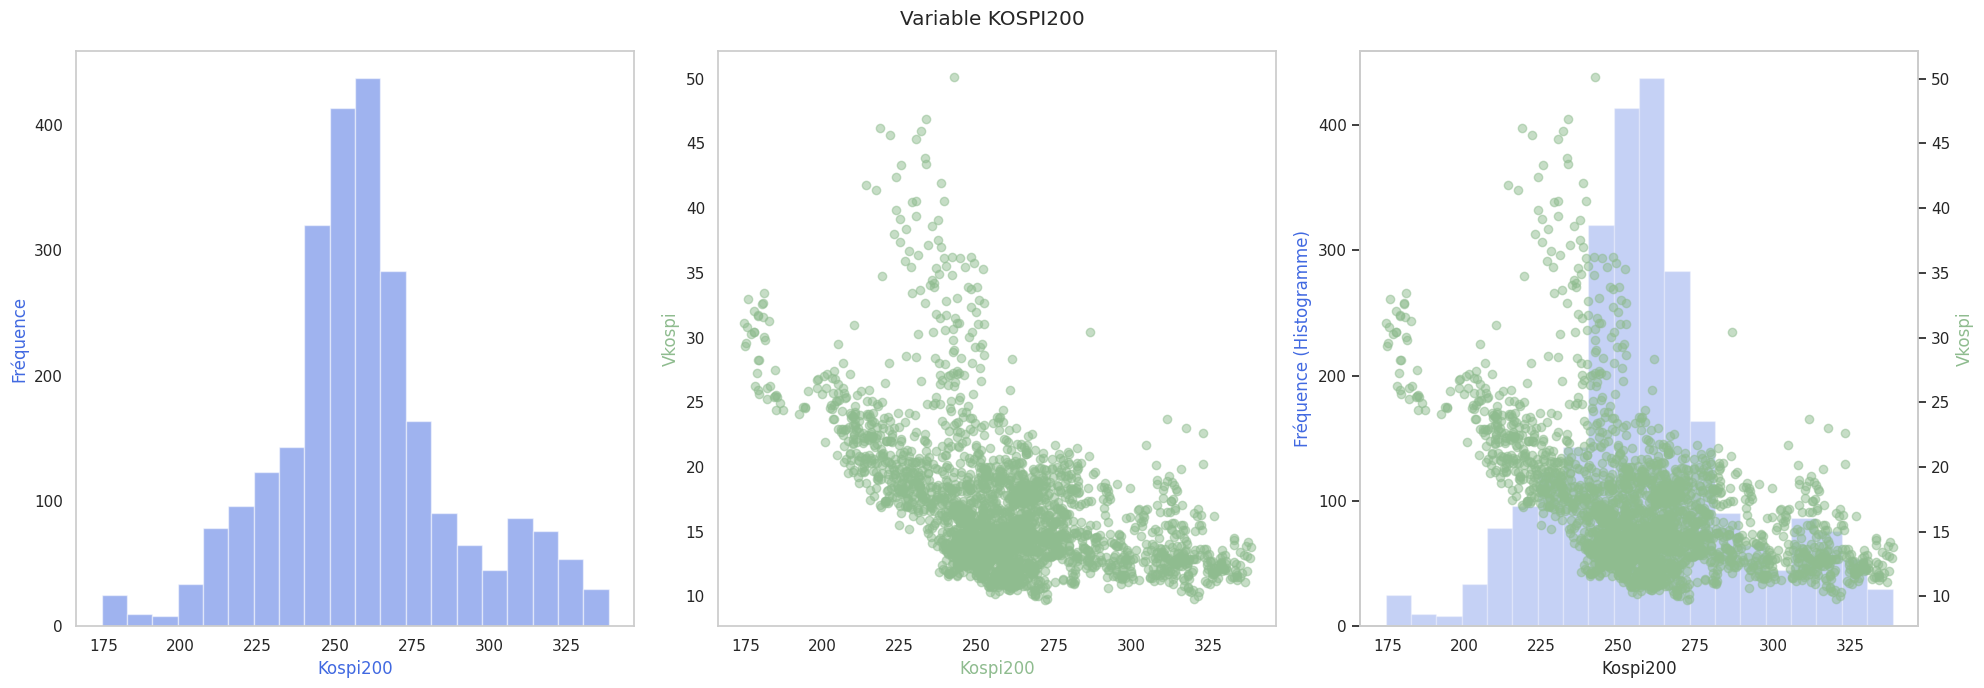

In [10]:
explore(data, 'KOSPI200', 'VKOSPI')

**/!\ Observation /!\**

On peut observer que la variable 'KOSPI200' n'a pas réellement de point sortant de la tendance. Donc aucune données ne sera supprimée

#####**Open_interest**

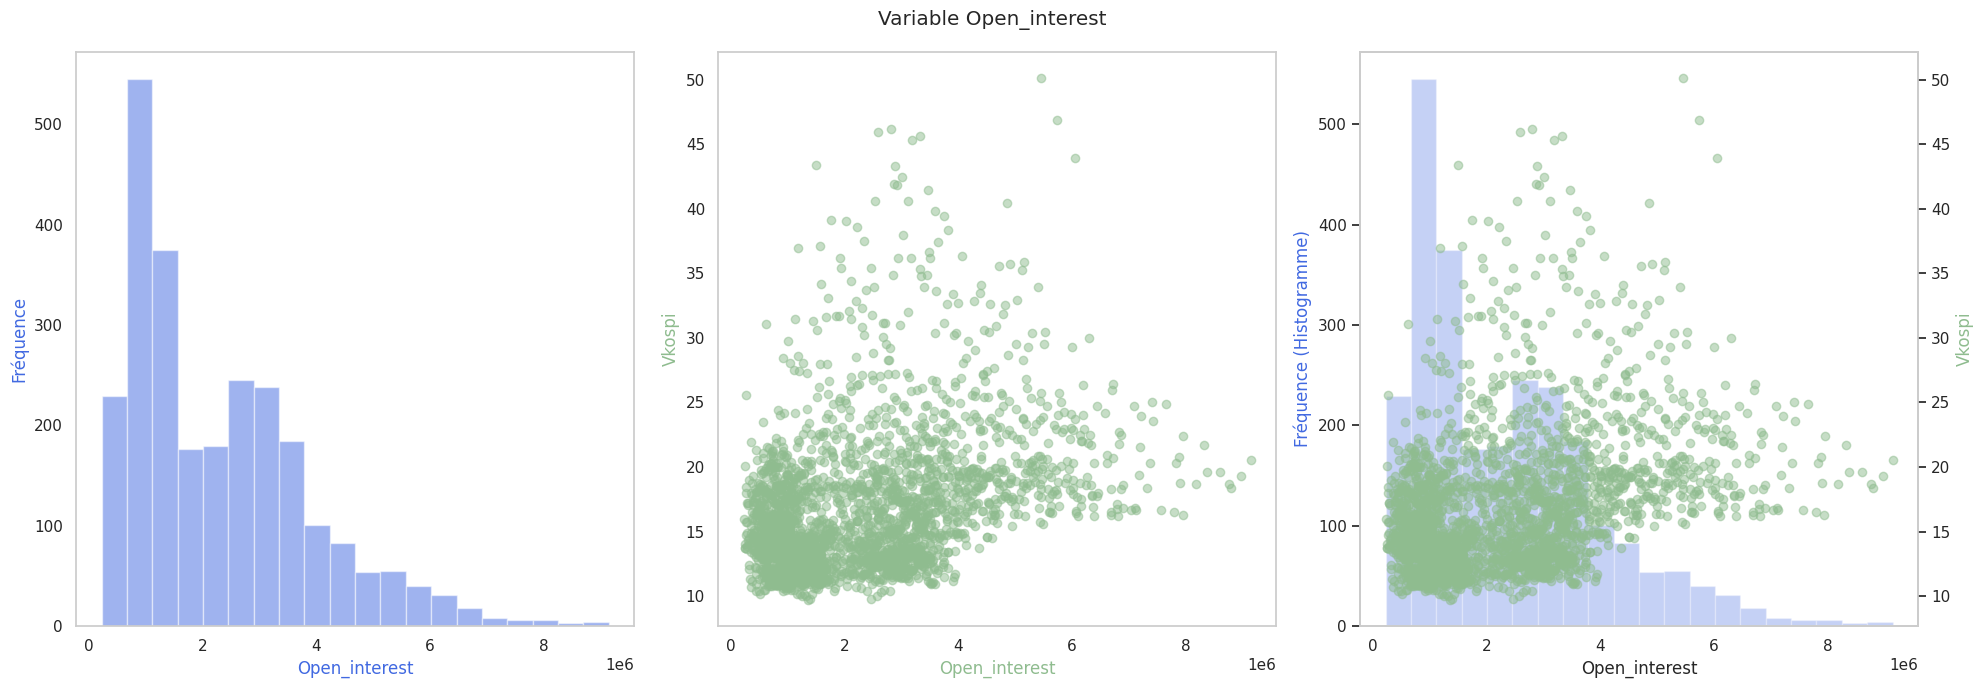

In [11]:
explore(data, 'Open_interest', 'VKOSPI')

**/!\ Observation /!\**

On peut observer que la variable 'Open_interest' a une tendance cohérentes avec les données réparties.

#####**For_KOSPI_Netbuying_Amount**

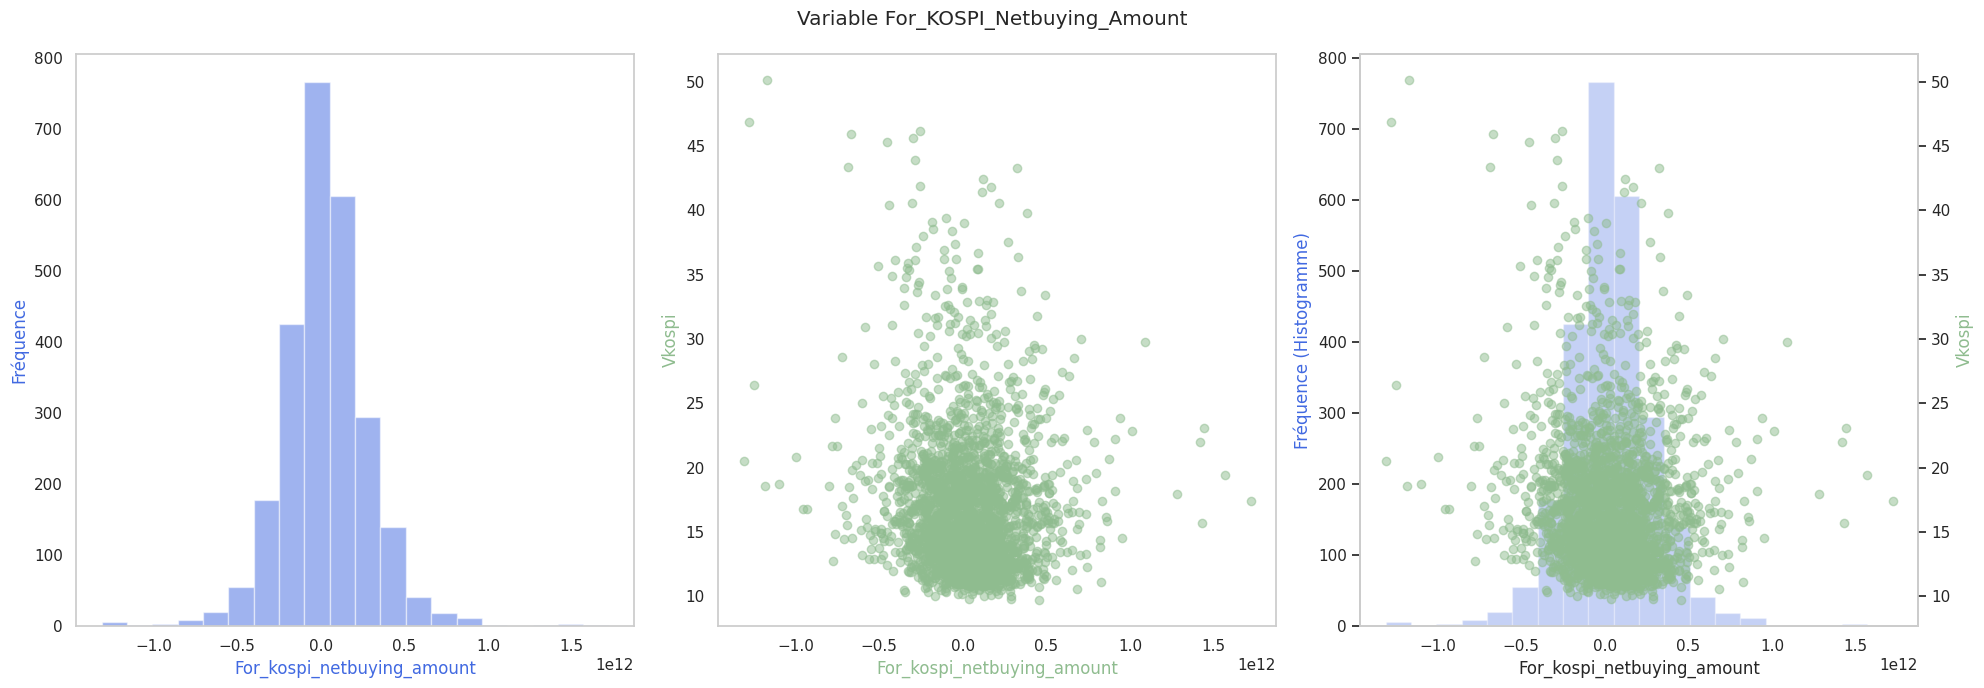

In [12]:
explore(data, 'For_KOSPI_Netbuying_Amount', 'VKOSPI')

**/!\ Observation /!\**

On voit que la majorité des données se concentrent aux alentours de l'intervalle [-0.5;0.5]*1e12 et par la suite, certaines données commencent à beaucoup s'éloigner de cette tendance. Pour avoir des données moins dispersé on va suprimer les données qui s'éloignent beaucoup.

In [13]:
delete = data.shape[0]
data = data.loc[(data['For_KOSPI_Netbuying_Amount'] >= -1e12) & (data['For_KOSPI_Netbuying_Amount'] <= 1.28e12)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 11


#####**For_Future_Netbuying_Quantity**

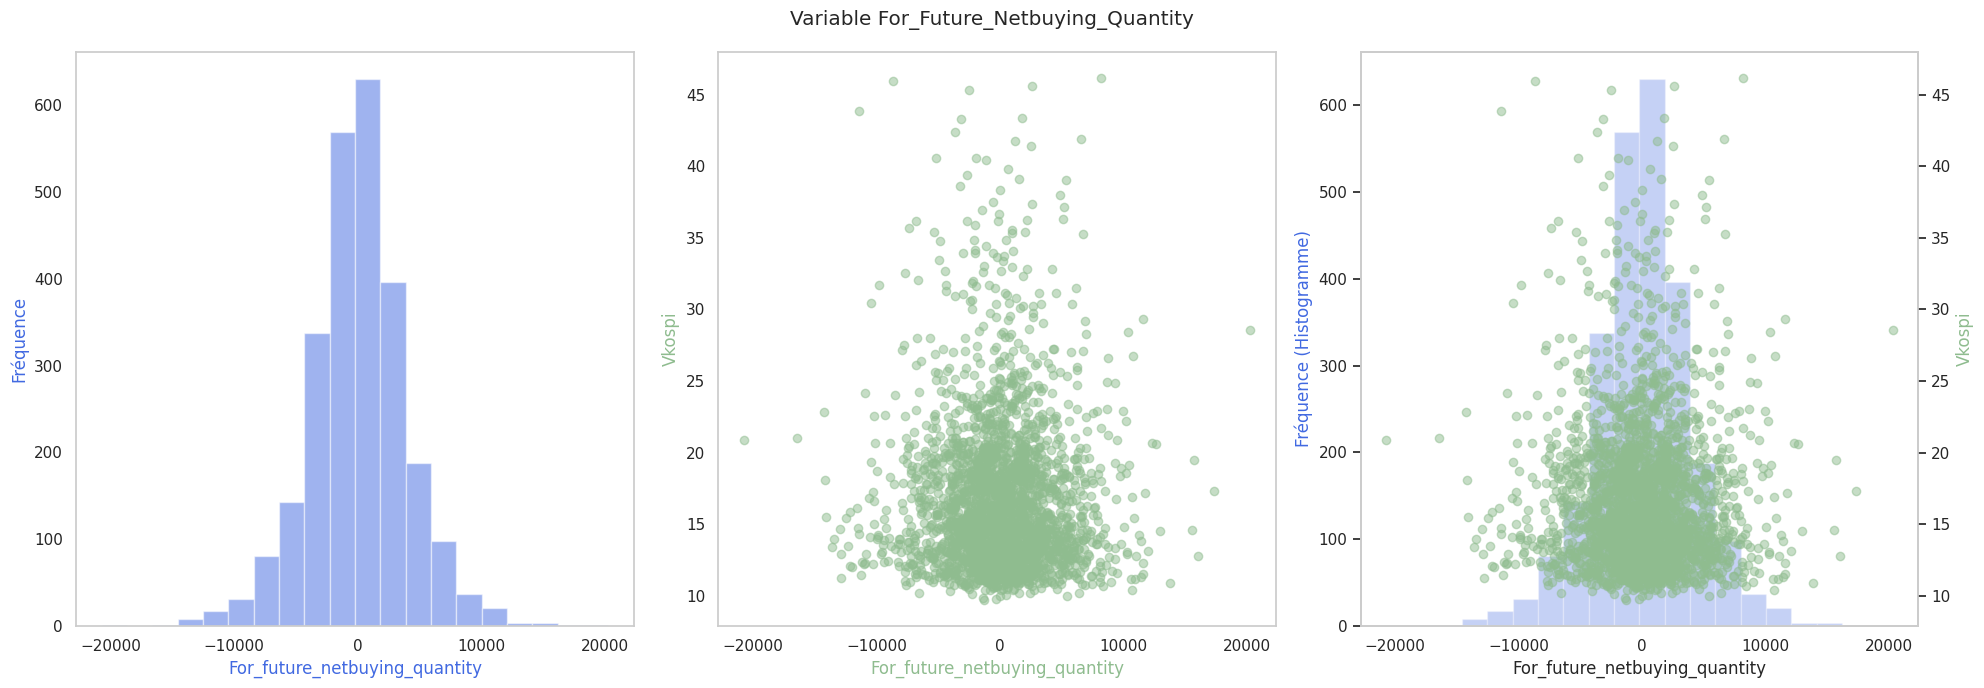

In [14]:
explore(data, 'For_Future_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

De même que dans le cas précédent, on a une concentration de données au centre, dans un intervalle aux alentours de [-10000;10000]. Dans le cas présent on supprimera que les deux points qui s'éloignent de tous les autres points.

In [15]:
delete = data.shape[0]
data = data.loc[(data['For_Future_Netbuying_Quantity'] >= -18000) & (data['For_Future_Netbuying_Quantity'] <= 20000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 2


#####**For_Call_Netbuying_Quantity**

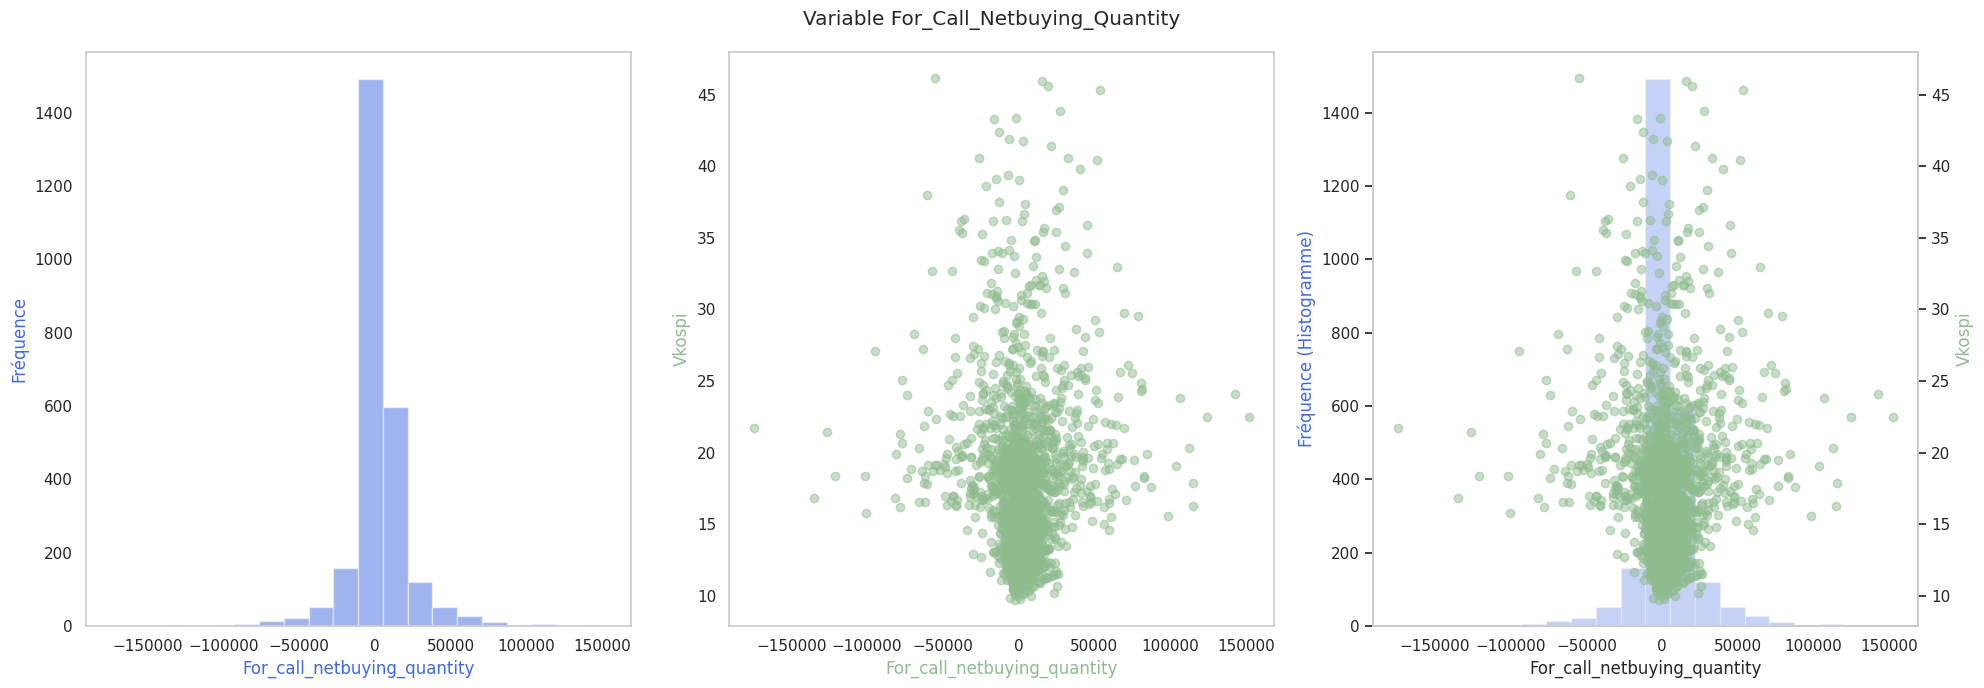

In [16]:
explore(data, 'For_Call_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

De même que dans les cas précédent, on a une concentration de données au centre, dans un intervalle aux alentours de [-25000;25000]. On supprimera ici les données qui s'éloignent beaucoup de la tendance.

In [17]:
delete = data.shape[0]
data = data.loc[(data['For_Call_Netbuying_Quantity'] >= -90000) & (data['For_Call_Netbuying_Quantity'] <= 98000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 16


#####**For_Put_Netbuying_Quantity**

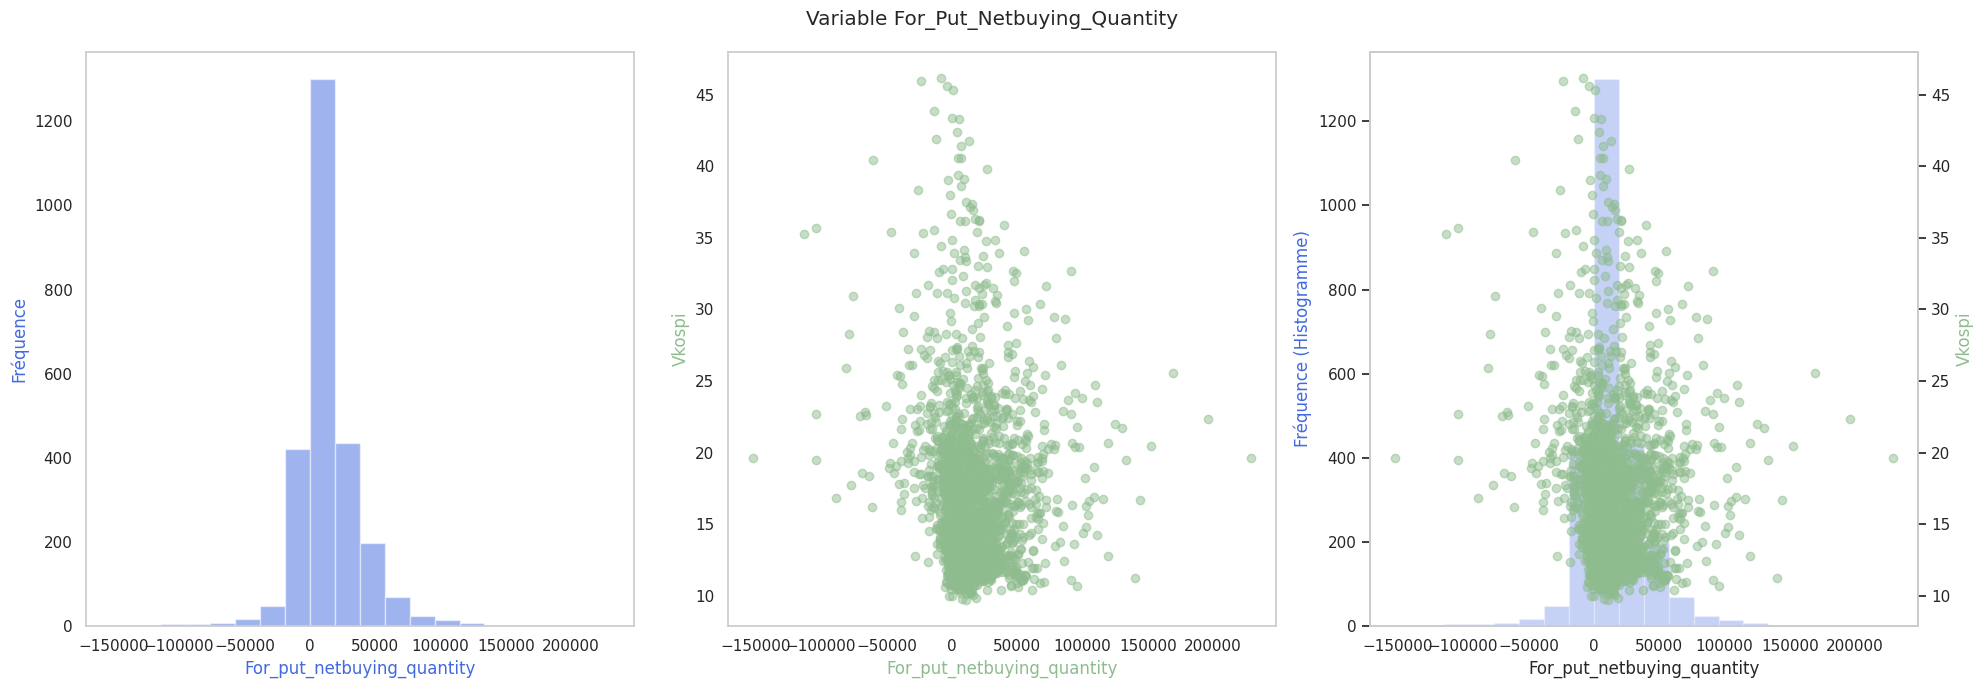

In [18]:
explore(data, 'For_Put_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

On a cette fois-ci une concentration principalement dans l'intervalle[-25000;25000] comme la répartition précédente. On observe une dispersion plus importante des données de part et d'autre, on essaiera de supprimer ceux qui s'éloignent réellement de la tendance afin d'éviter de supprimer un grand volume de données pouvant rendre le modèle trop simple.

In [19]:
delete = data.shape[0]
data = data.loc[(data['For_Put_Netbuying_Quantity'] >= -100000) & (data['For_Put_Netbuying_Quantity'] <= 150000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 9


#####**Indiv_Future_Netbuying_Quantity**

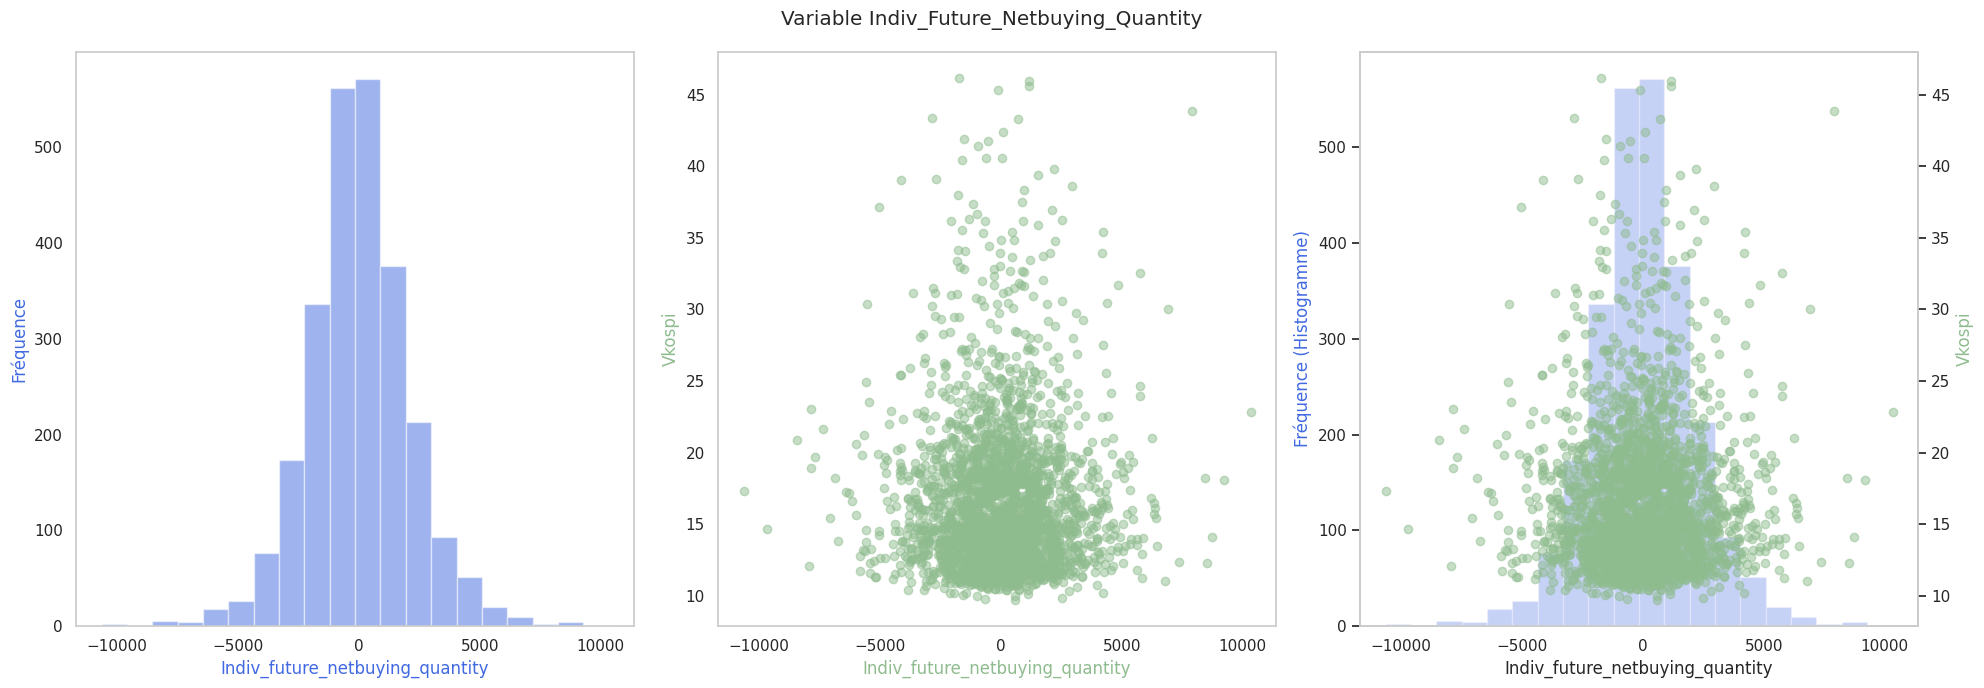

In [20]:
explore(data, 'Indiv_Future_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

Les données se concentrent dans l'intervalle[-5000;5000]. On observe également une dispersion plutôt importante des données de part et d'autre, on essaiera de supprimer ceux qui s'éloignent réellement de la tendance comme précédemment.

In [21]:
delete = data.shape[0]
data = data.loc[(data['Indiv_Future_Netbuying_Quantity'] >= -7500) & (data['Indiv_Future_Netbuying_Quantity'] <= 7900)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 13


#####**Indiv_Call_Netbuying_Quantity**

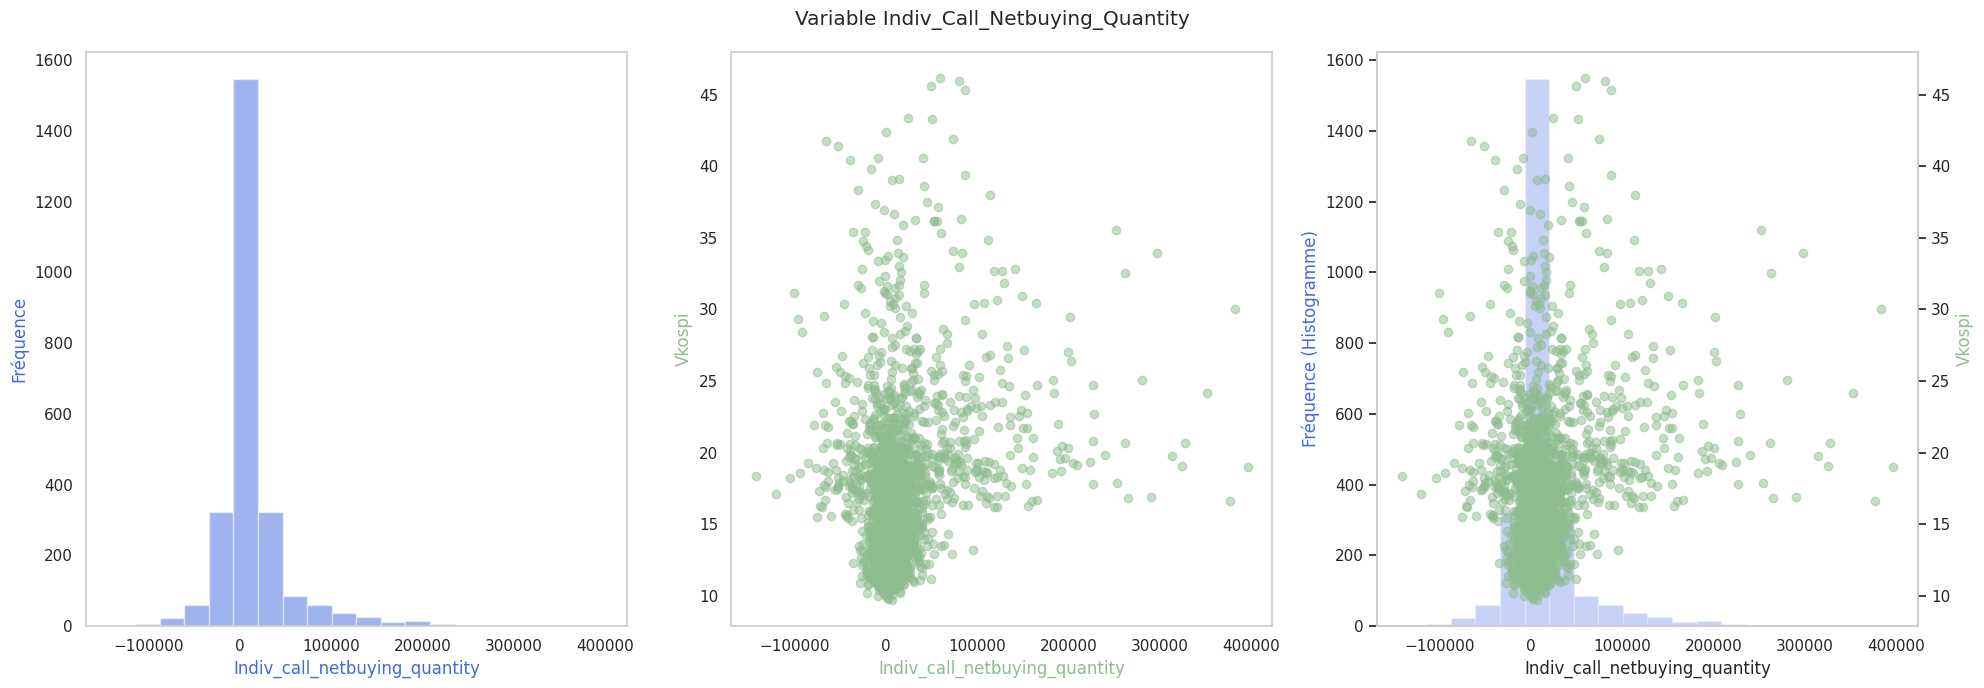

In [22]:
explore(data, 'Indiv_Call_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

Les données se concentrent dans l'intervalle[-50000;50000]. On remaque que le données s'étalent énorment dans un direction.  Ces données peuvent avoir une importance, c'est pourquoi on supprimera que les données les plus éloignés dans un premier temps.

In [23]:
delete = data.shape[0]
data = data.loc[(data['Indiv_Call_Netbuying_Quantity'] >= -101000) & (data['Indiv_Call_Netbuying_Quantity'] <= 270000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 13


#####**Indiv_Put_Netbuying_Quantity**

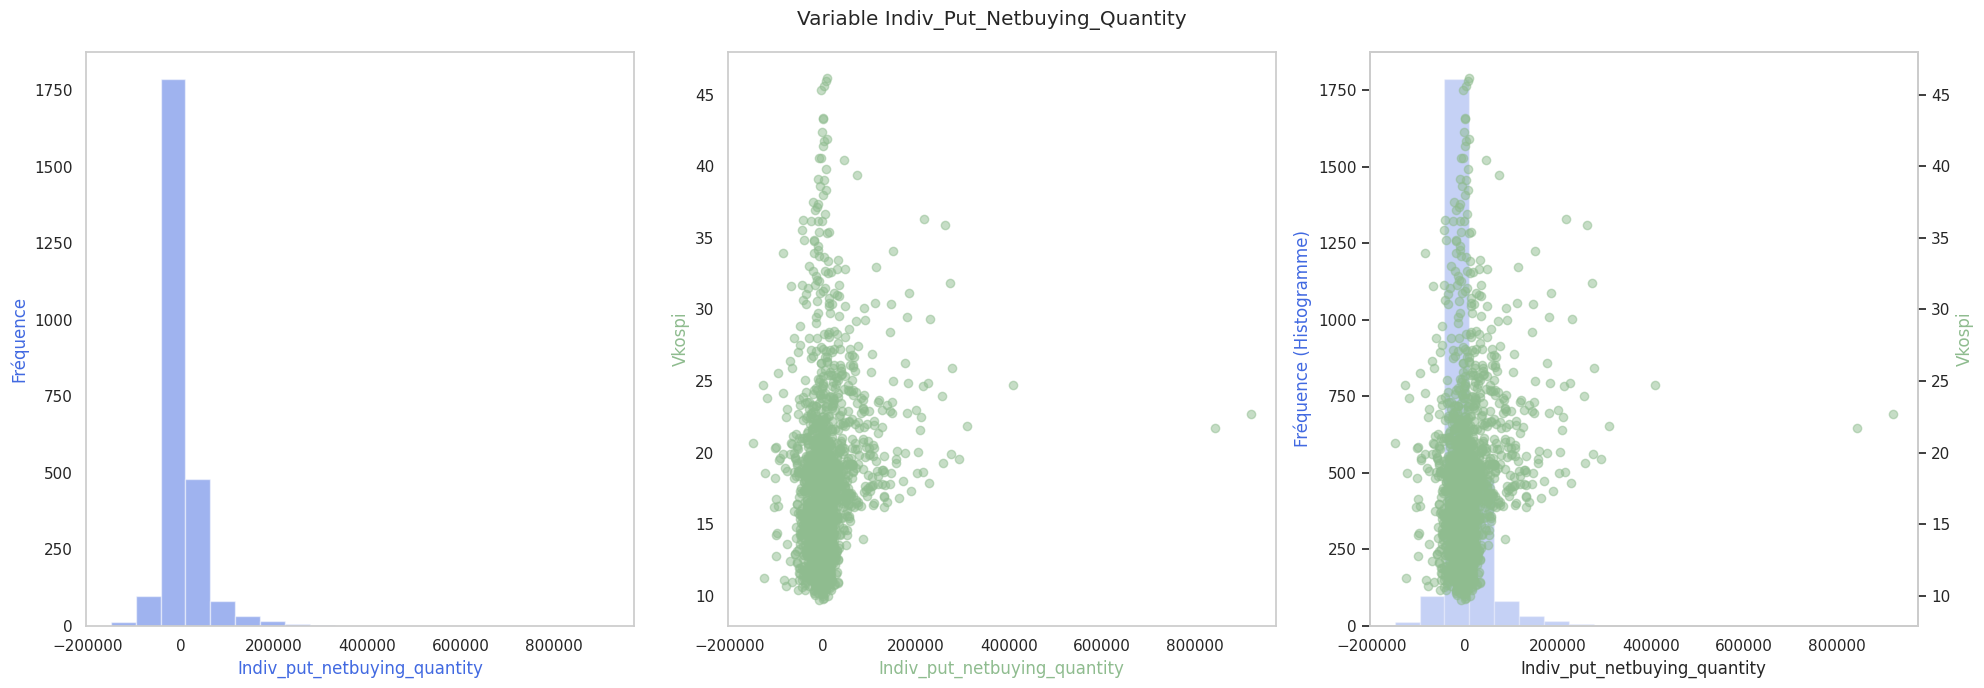

In [24]:
explore(data, 'Indiv_Put_Netbuying_Quantity', 'VKOSPI')

**/!\ Observation /!\**

Ici, la quasi totalité des données se concentrent aux mêmes intervalles [-100000,100000] à quelques exceptions près. En particulier 2 points qui se retrouvent isolés. On supprimera également le point le plus éloignés de la tendance et seul.

In [25]:
delete = data.shape[0]
data = data.loc[(data['Indiv_Put_Netbuying_Quantity'] <= 400000)]
print("Nombre de données supprimées : %d" % (delete - data.shape[0]))

Nombre de données supprimées : 3


#####**PCRatio**

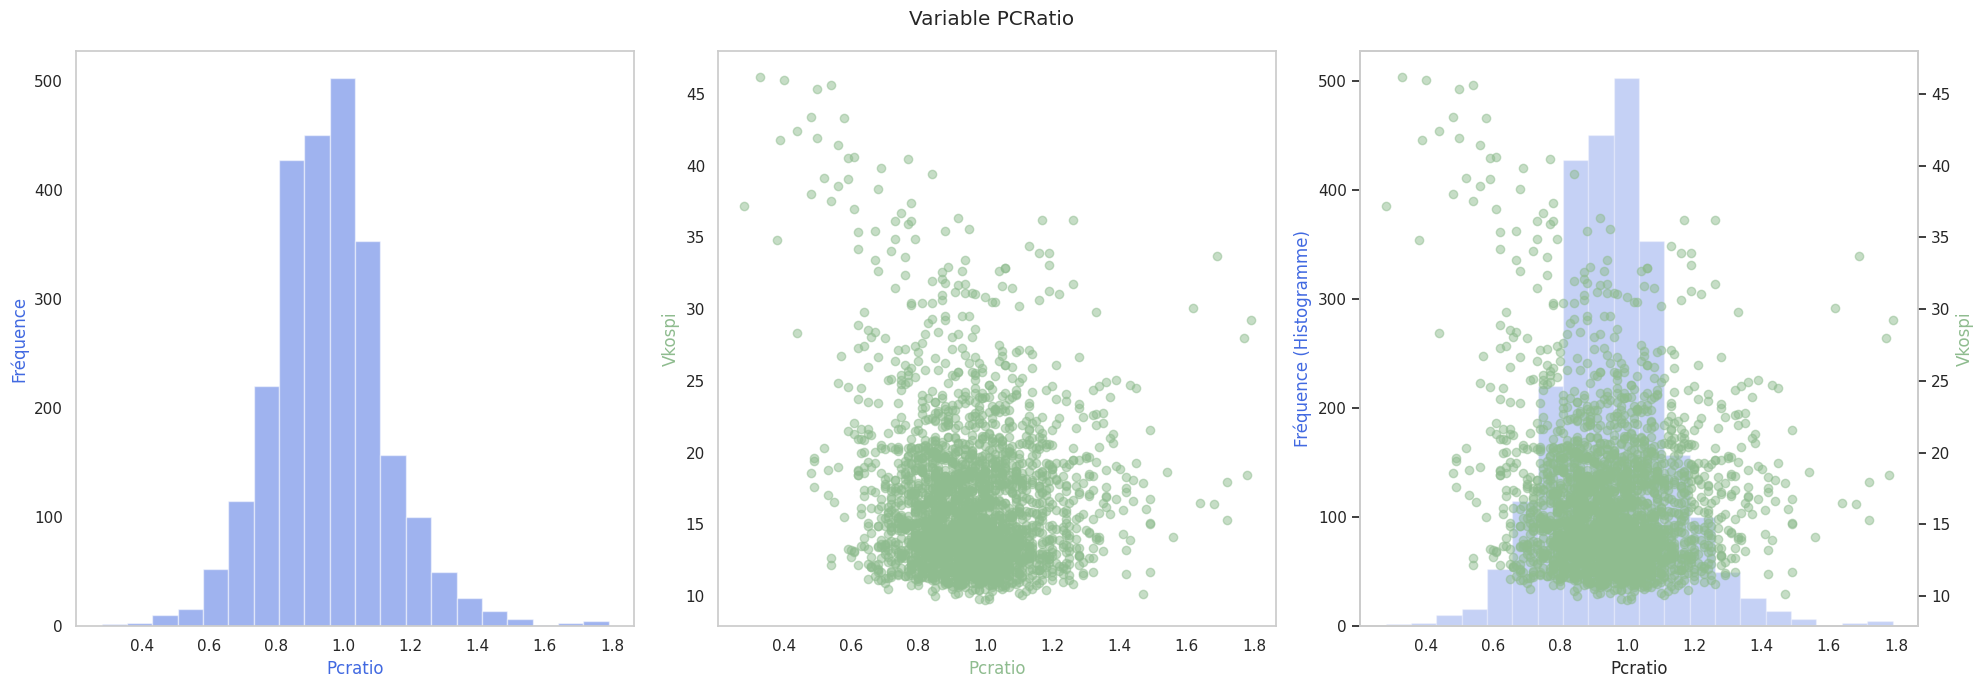

In [26]:
explore(data, 'PCRatio', 'VKOSPI')

**/!\ Observation /!\**

On se retrouve toujours dans un cas similaires des précédents. Ici étant un ration Call-Put nous allons laisser les données telles quelles.

#####**Conséquence**

On va créer une méthode explore_all qui nous permettra d'afficher tous les graphes. Maintenant que nous avons fait le tri, il n'est plus nécessaire de les analyser un par un à nouveau sous forme graphique.

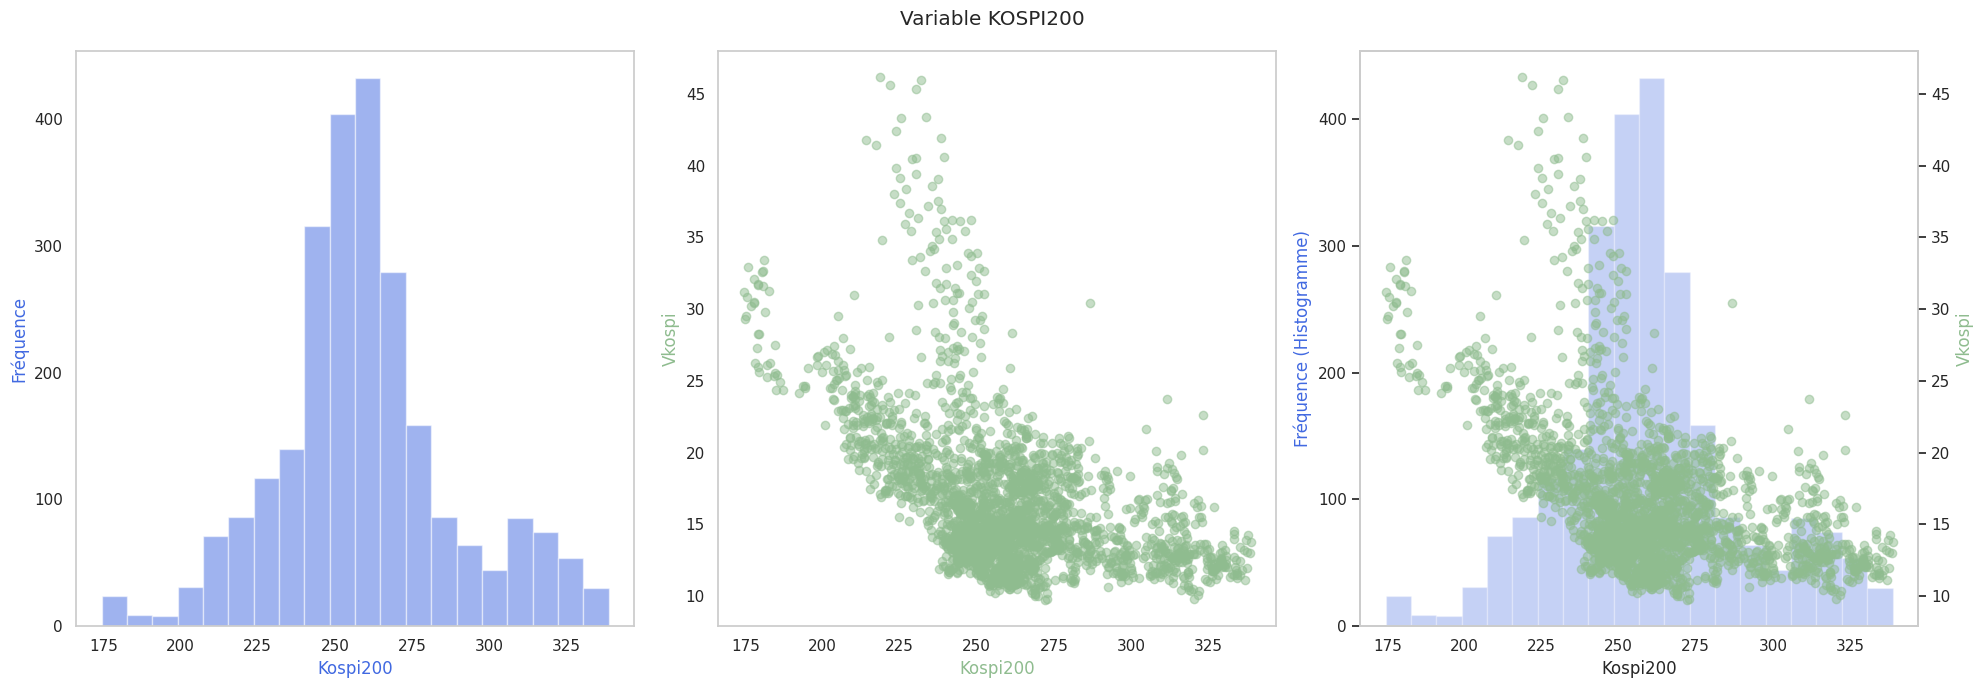

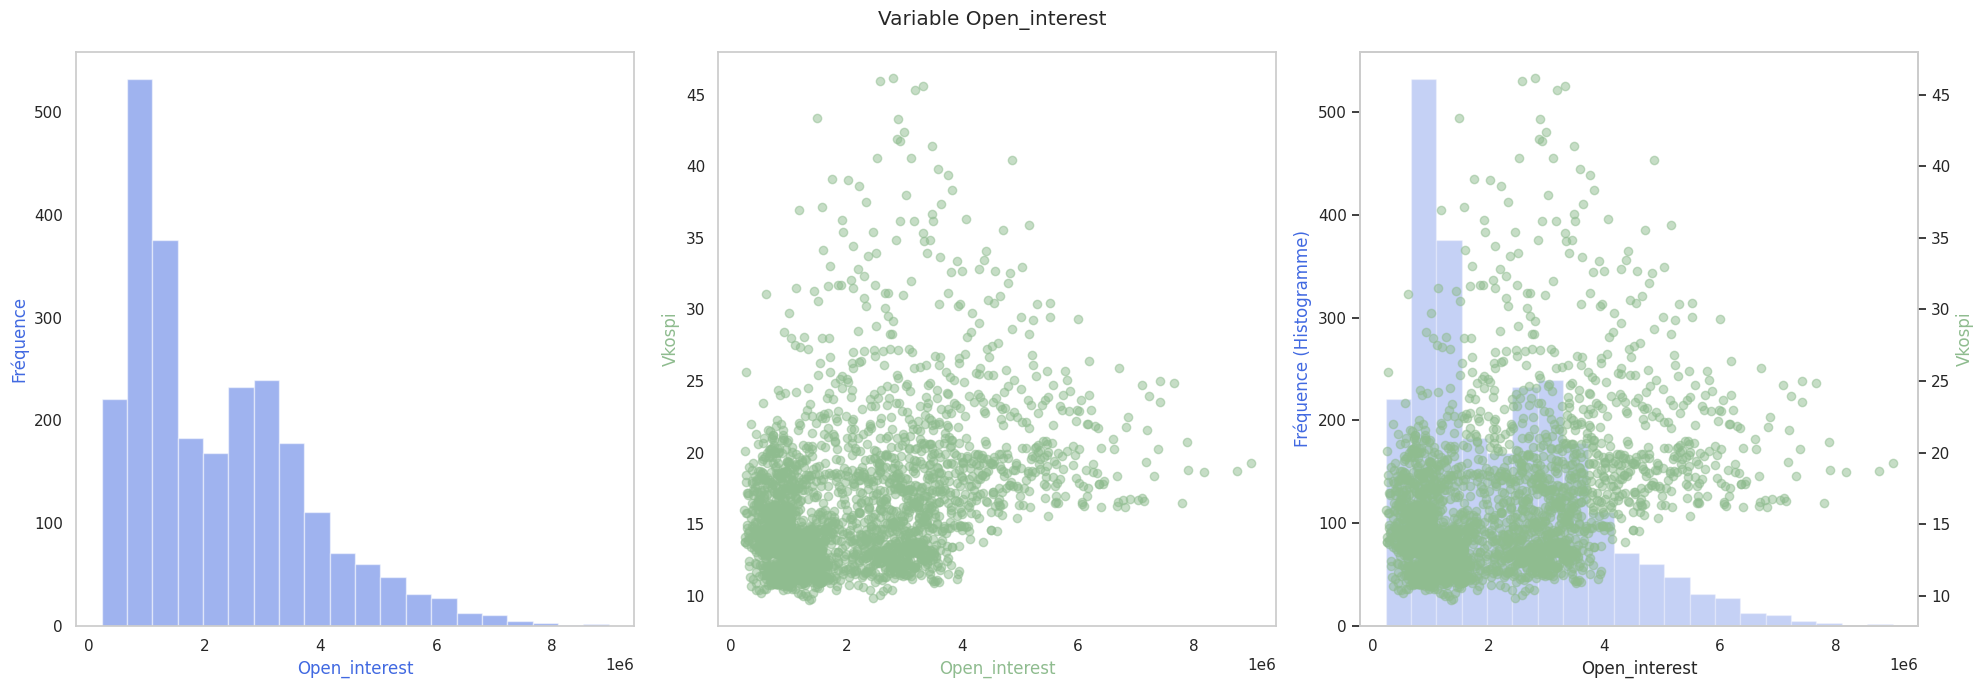

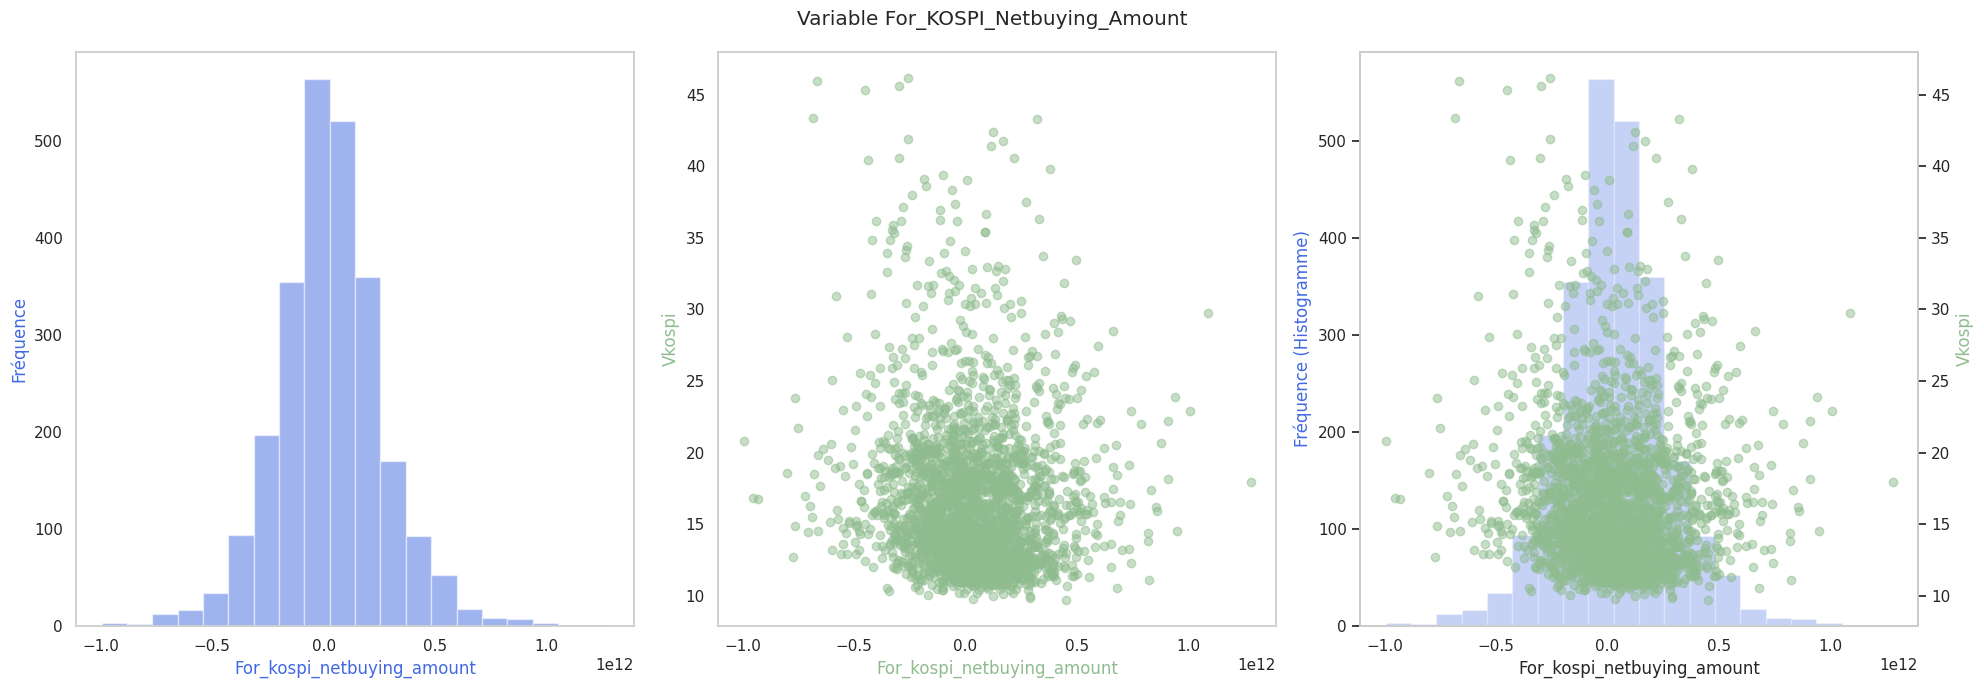

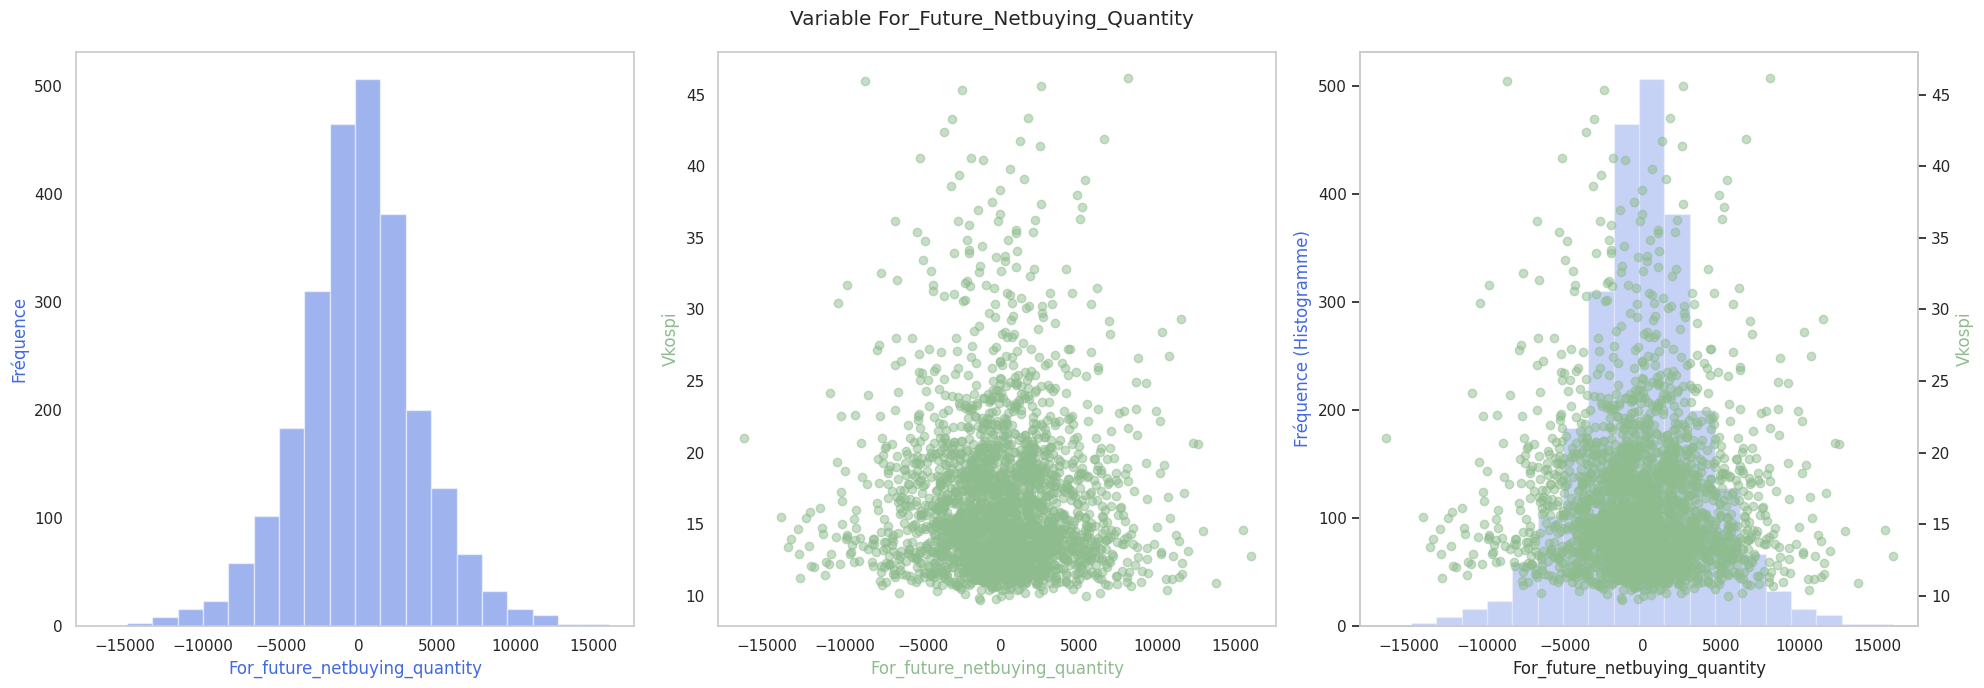

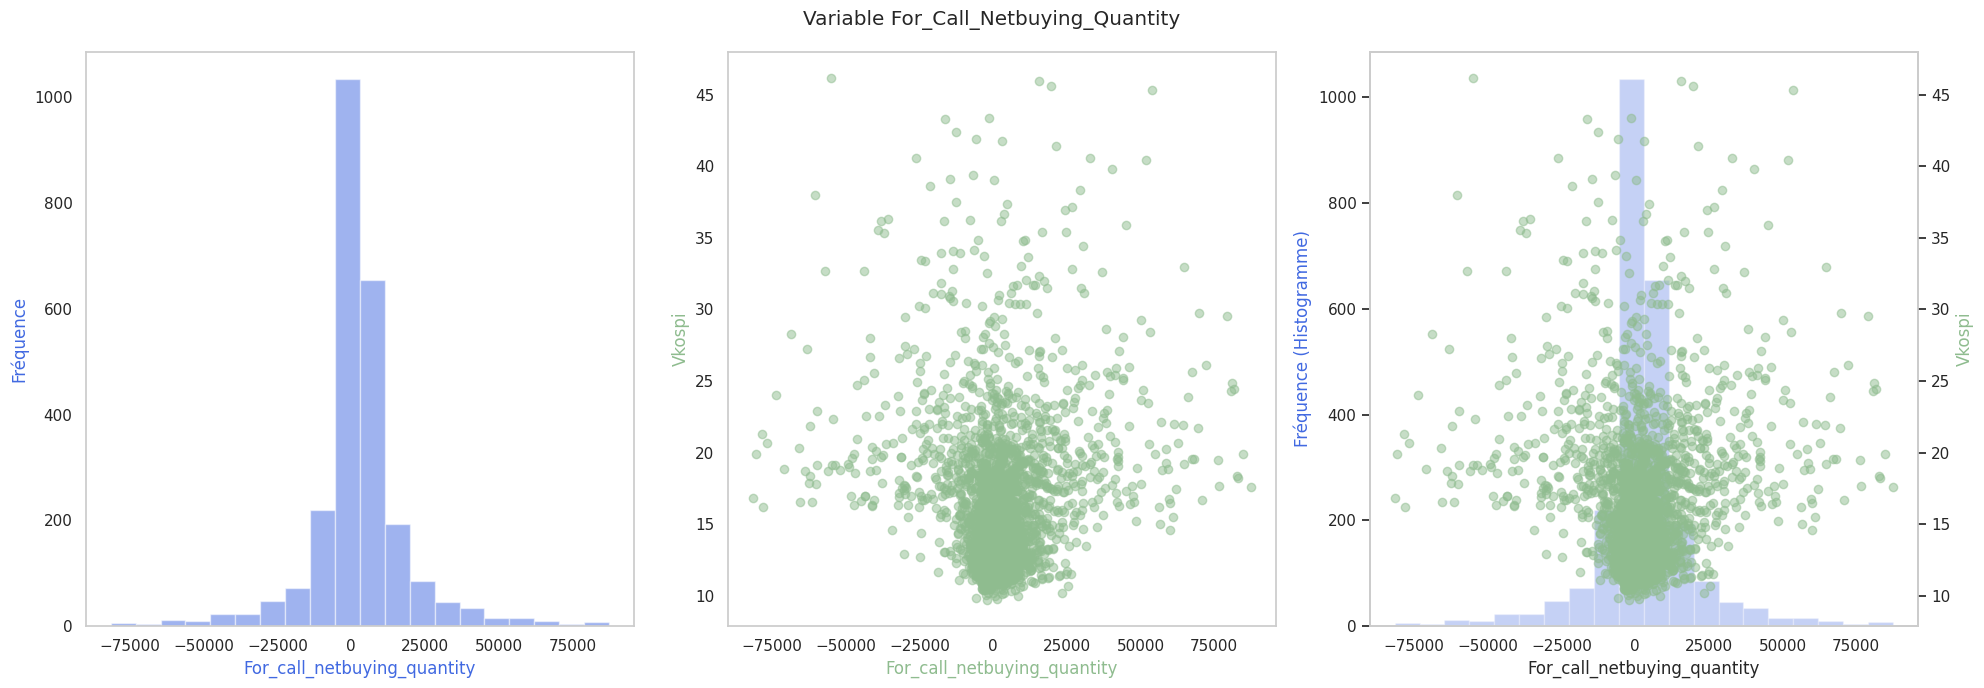

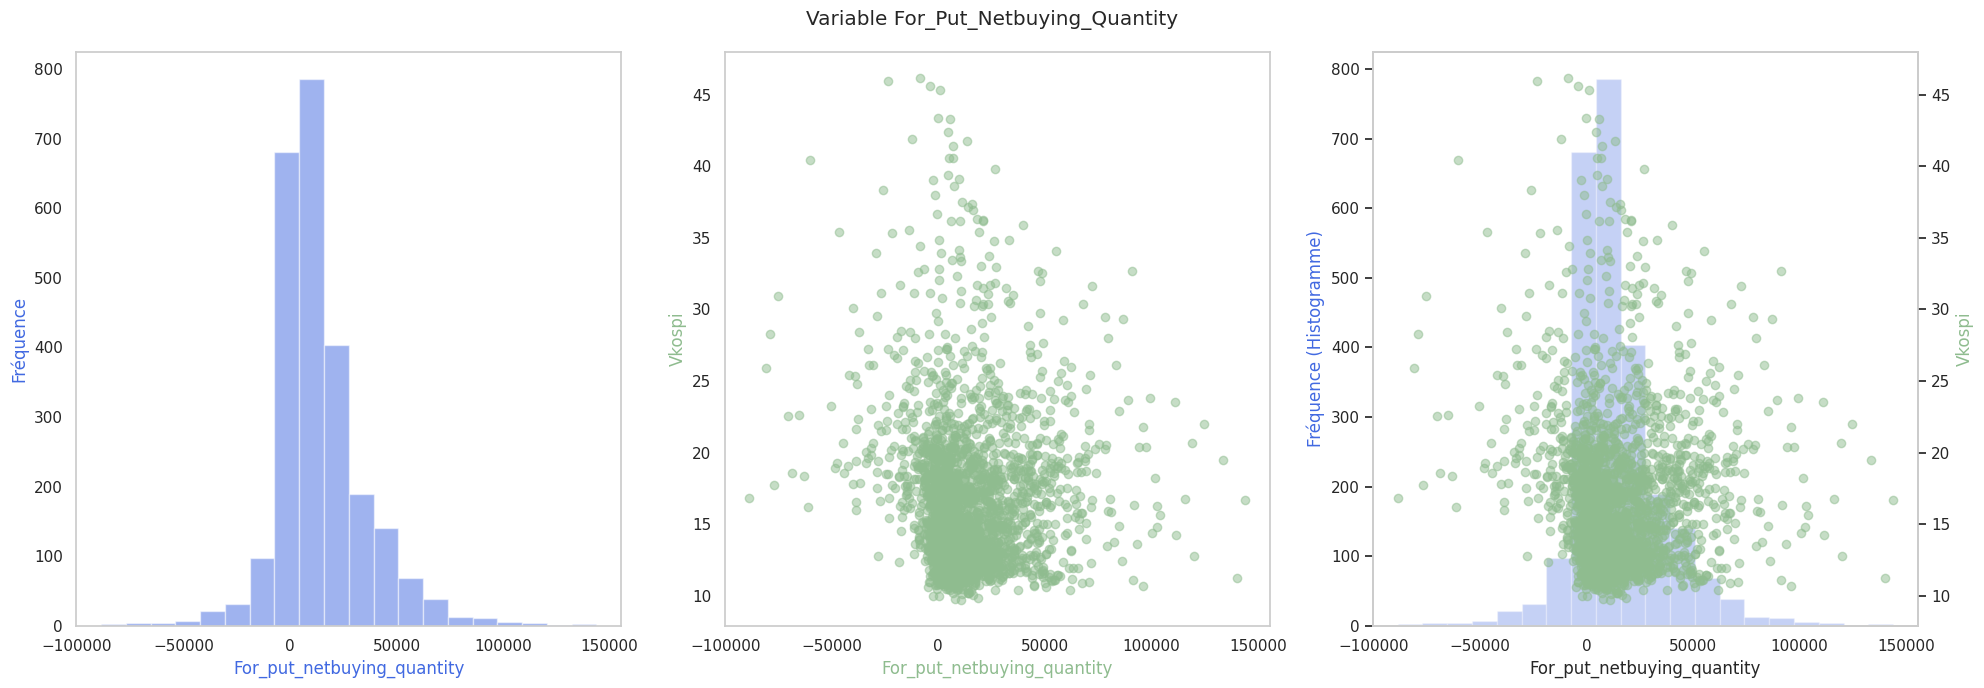

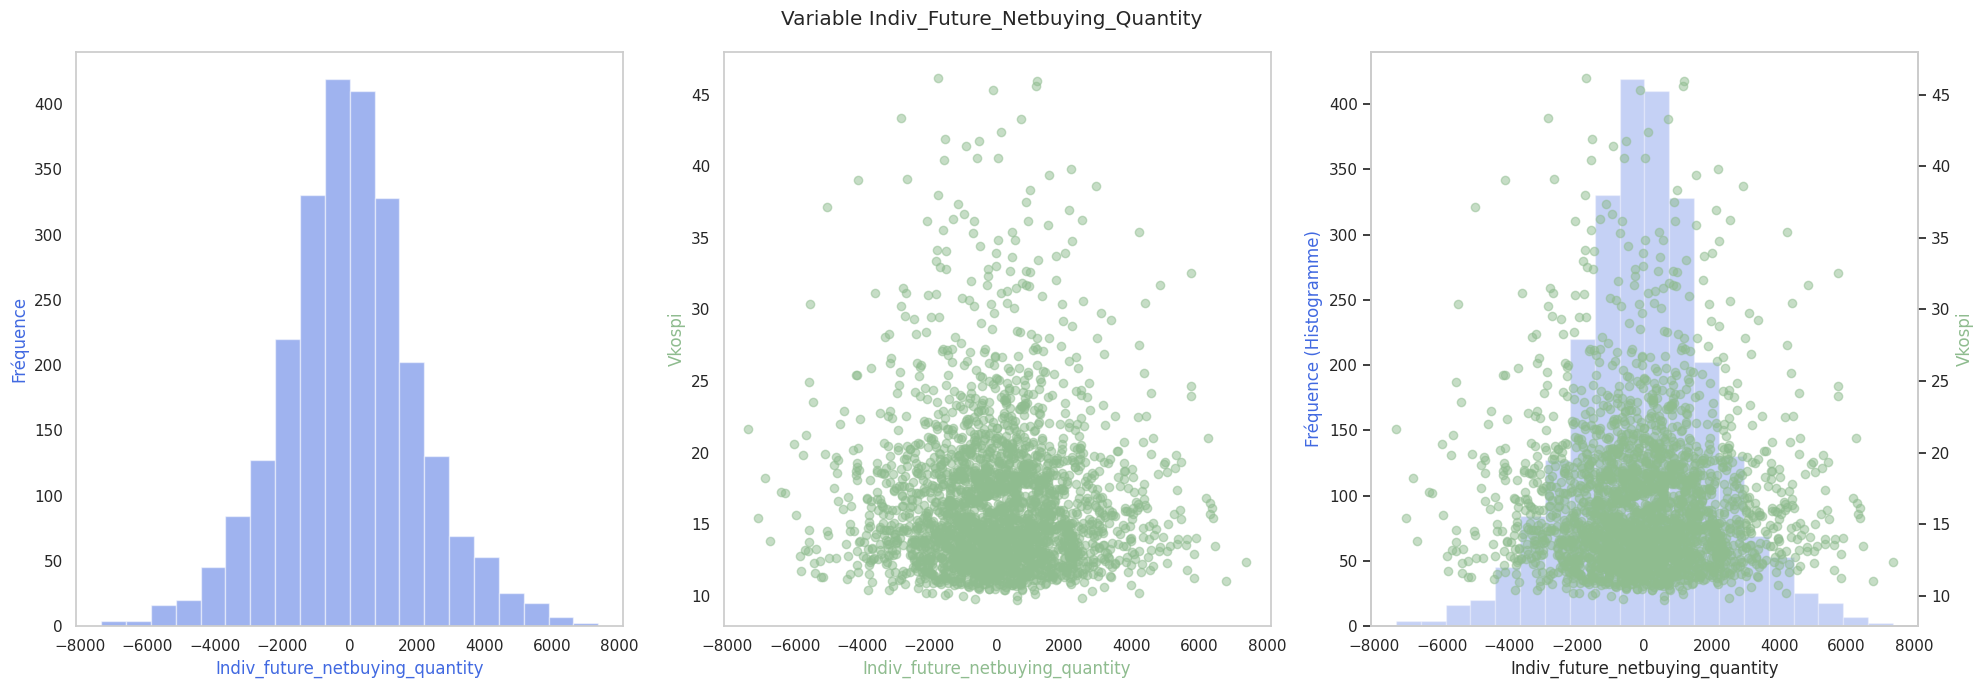

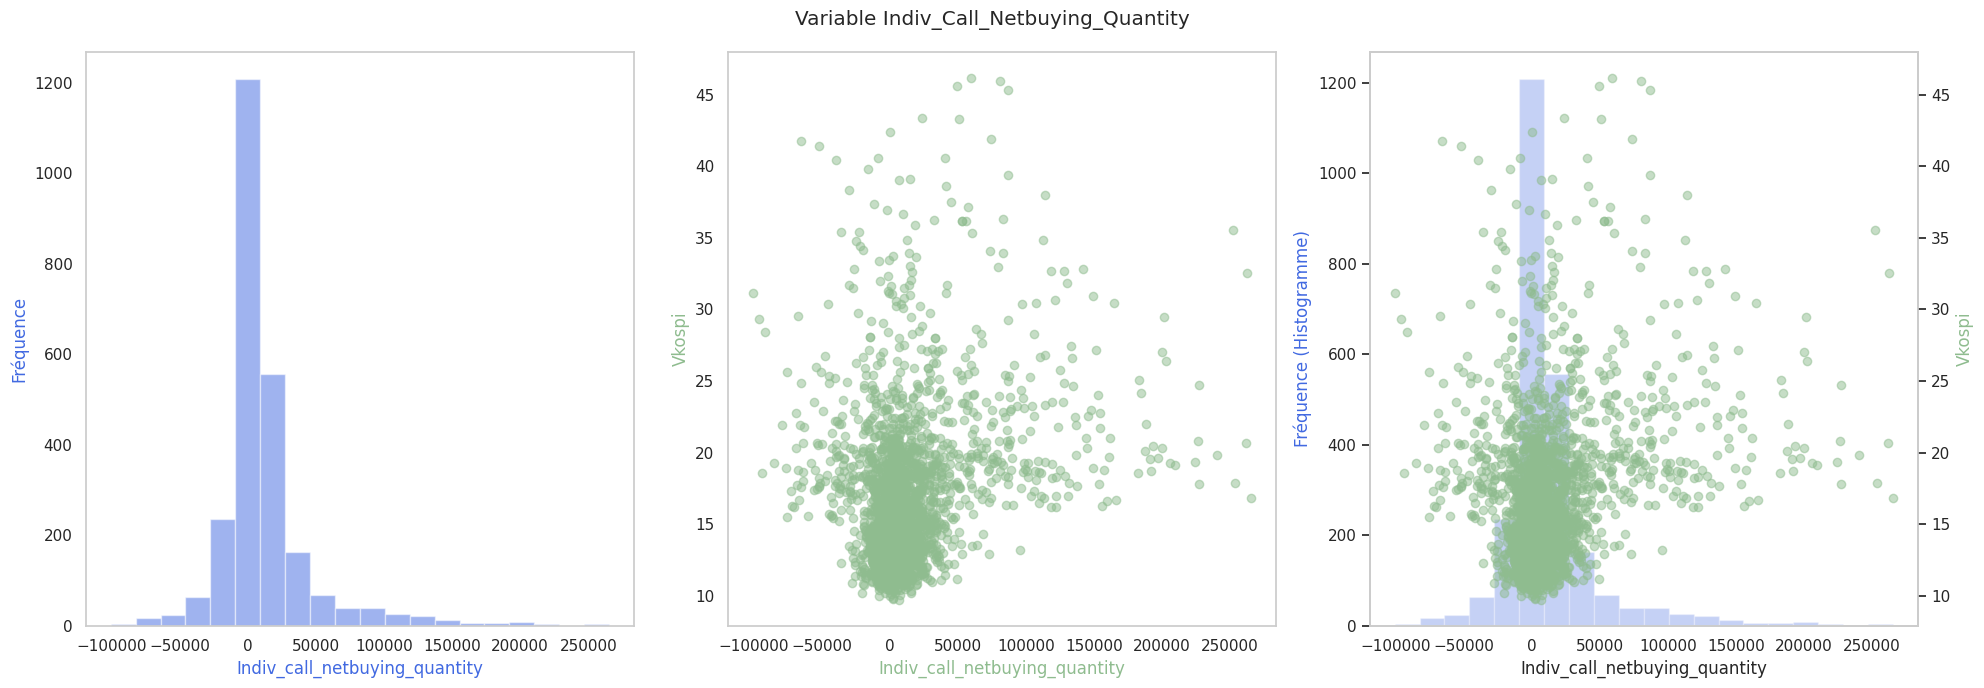

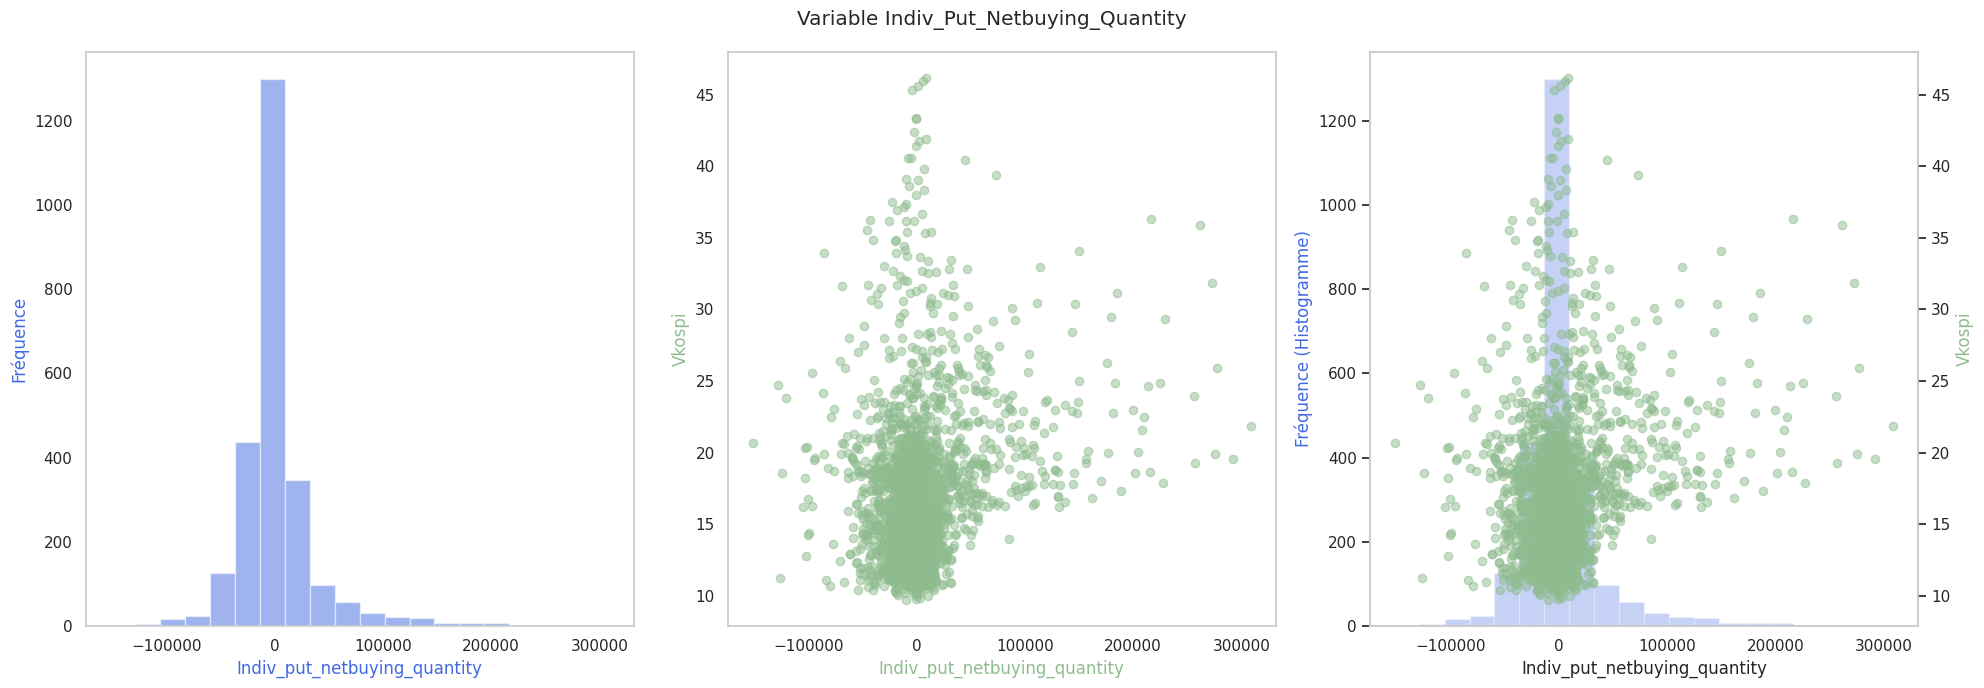

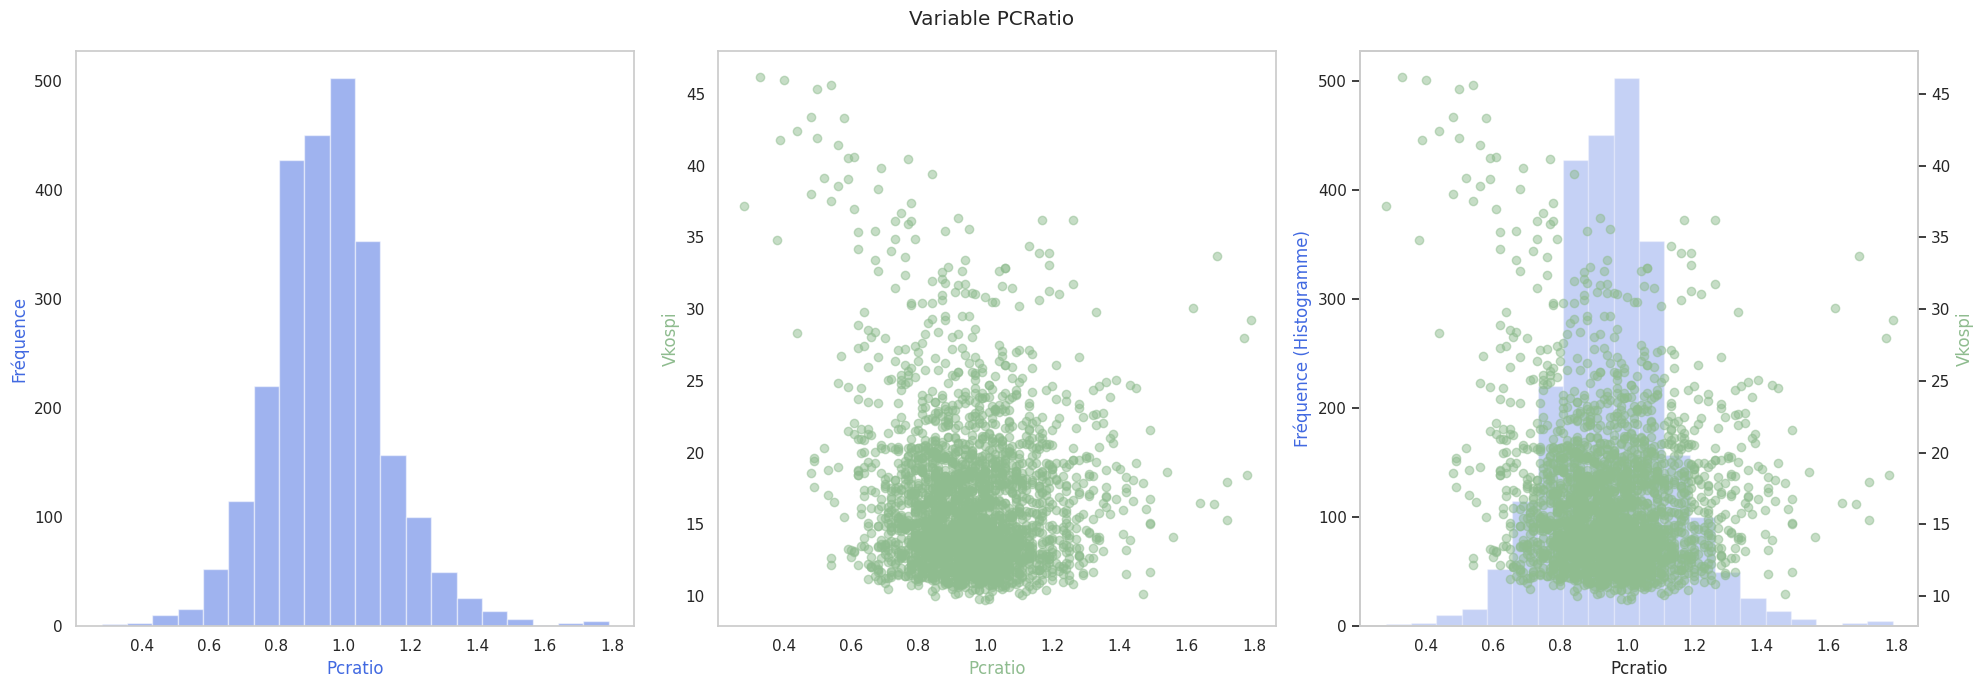

In [27]:
def explore_all(df, columnns, target_column, alpha=0.5, figsize=(20, 7)):
    for i, column in enumerate(columns):
        explore(df, column, target_column, alpha, figsize)

columns = ["KOSPI200",
"Open_interest",
"For_KOSPI_Netbuying_Amount",
"For_Future_Netbuying_Quantity",
"For_Call_Netbuying_Quantity",
"For_Put_Netbuying_Quantity",
"Indiv_Future_Netbuying_Quantity",
"Indiv_Call_Netbuying_Quantity",
"Indiv_Put_Netbuying_Quantity",
"PCRatio",
]

explore_all(data, columns, 'VKOSPI')

Sur la quasi totalité de nos graphiques, on remarque une tendance sous forme de parabole qui peut se résumé à une tendance de la forme quadratique. Si nécessaire, nous ajouterons de nouvelles features pour avoir de meilleure performance par la suite.

In [28]:
print("Taille initiale : %d" % initial_size)
print("Taille finale : %d" % data.shape[0])
delta = initial_size - data.shape[0]
ratio = round((delta / initial_size) * 100, 2)
print(f"Delta : {delta} soit {ratio:.2f}% des données de base")

Taille initiale : 2580
Taille finale : 2513
Delta : 67 soit 2.60% des données de base


Actuellement on a supprimé 67 données. Il faut savoir que ces données peuvent peut être s'avérer utilise lors du calcul de la performance et apporte une contribution significative. Elles peuvent appartenir à des tendances particulières. C'est pourquoi on doit garder de côtés cette éventuelle possibilité.



**[OK]** Les données qui s'éloignent beaucoup des tendances ont été supprimées.

####**2.3.3 Analyse des données catégorielles**

Pour l'analyse de nos données catégorielles nous allons utiliser une visualisation violin plot avec une méthode violin_plot implémenté ci-dessous :

In [49]:
def violin_plot(column, figsize=(15, 8), hue=None, palette="viridis"):
    plt.figure(figsize=figsize)
    sns.violinplot(data=data, x="VKOSPI", y=column, inner=None, hue=hue, palette=palette)
    plt.title(f"Distribution de la VKOSPI en fonction de {column.capitalize()}")
    plt.show()

Nous avons que la variable "Day_of_a_week" comme donnée catégorielle, donc appellera la fonction une unique fois.

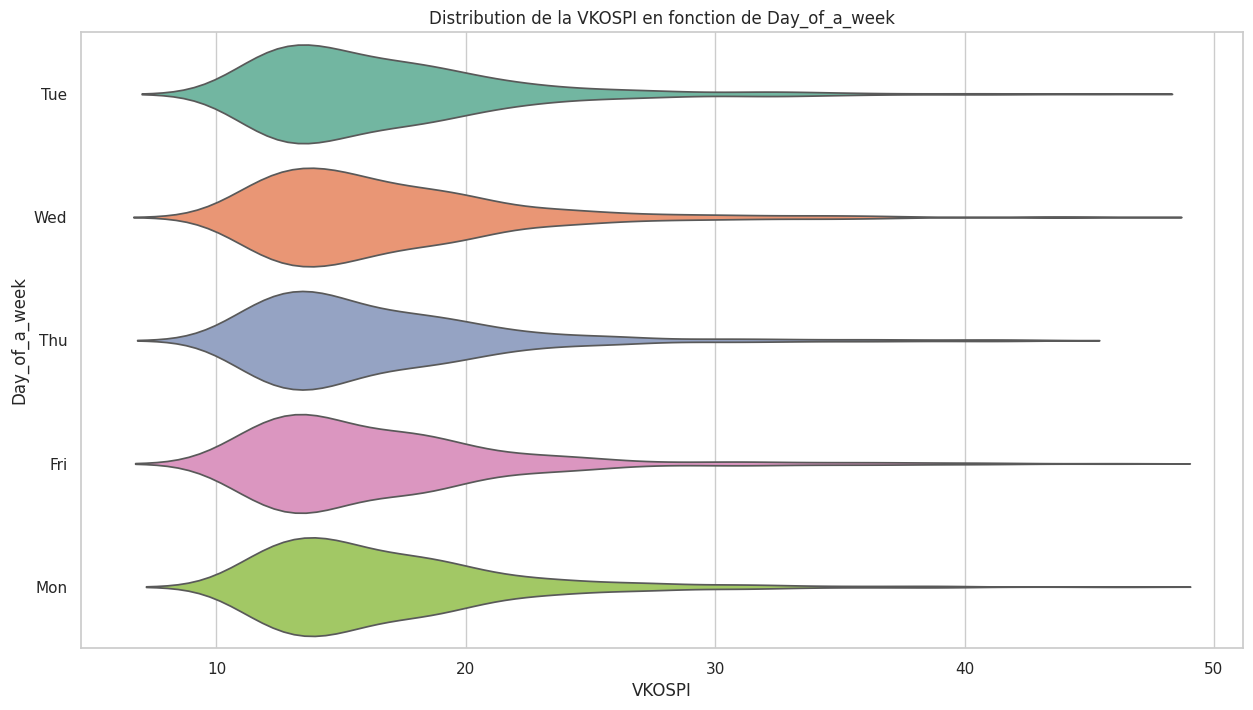

In [51]:
violin_plot("Day_of_a_week", hue="Day_of_a_week", palette="Set2")

**/!\ Observation /!\**

On remarque qu'il n'ya pas de trendance particulière qui s'en dégage. Les données catégorielles ne peuvent pas être exploitées directement. Par conséquent, nous allons appliquer un one-hot encoding afin de les rendre utilisables dans notre modèle de régression linéaire.

In [53]:
data = pd.get_dummies(data, columns=["Day_of_a_week"])
data.head()

Date  VKOSPI  KOSPI200  Open_interest  For_KOSPI_Netbuying_Amount  \
0 2009-06-02   33.45    180.90        4377777                4.940000e+11   
1 2009-06-03   32.66    180.47        4562690               -8.997074e+10   
2 2009-06-04   32.56    180.31        4827524               -1.090000e+11   
3 2009-06-05   32.95    175.75        5022921                9.842024e+10   
4 2009-06-08   30.41    177.77        5293996                4.329179e+10   

   For_Future_Netbuying_Quantity  For_Call_Netbuying_Quantity  \
0                          -4953                       -24646   
1                             47                       -57128   
2                          -7666                        -2000   
3                            969                        64792   
4                           5797                        10995   

   For_Put_Netbuying_Quantity  Indiv_Future_Netbuying_Quantity  \
0                        6581                             1228   
1                       46851                              399   
2                       48883                             5744   
3                       27196                            -1688   
4                       23123                            -5534   

   Indiv_Call_Netbuying_Quantity  ...  PCRatio  Day_till_expiration  Year  \
0                           -466  ...     0.94                    7  2009   
1                         127709  ...     0.93                    6  2009   
2                         262558  ...     0.87                    5  2009   
3                          79789  ...     0.89                    4  2009   
4                          97154  ...     0.81                    3  2009   

   Month  Day  Day_of_a_week_Fri  Day_of_a_week_Mon  Day_of_a_week_Thu  \
0      6    2              False              False              False   
1      6    3              False              False              False   
2      6    4              False              False               True   
3      6    5               True              False              False   
4      6    8              False               True              False   

   Day_of_a_week_Tue  Day_of_a_week_Wed  
0               True              False  
1              False               True  
2              False              False  
3              False              False  
4              False              False  

[5 rows x 21 columns]

# Modélisation

Nous avons maitenant un dataset nettoyé avec une première idées des éventuelles données qui seront utiles. Nous allons créer plusieurs modélisations et mesurer les performances.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression



def train_predict(X, y, name, metric=mean_squared_error, cv=5):
    model = LinearRegression()
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric), cv=cv)
    mean_scores = np.mean(scores)
    std_scores = np.std(scores)
    print("%s : %0.4f (+/- %0.4f)" % (name, mean_scores, std_scores))

In [ ]:
RMSE = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))

Nous avons réaliser un travail de nettoyage, essayons de mesurer l'apport de chaque partie


In [ ]:
def preprocessing(remove_outliers=True, get_categorical=True):
    data = pd.read_csv("./sample_data/options_KR.csv")

    data['Date'] = pd.to_datetime(data['Date'])


    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data = data.drop(columns=['Date'])


    if remove_outliers:
        data = data.loc[(data['For_KOSPI_Netbuying_Amount'] >= -1e12) & (data['For_KOSPI_Netbuying_Amount'] <= 1.28e12)]
        data = data.loc[(data['For_Future_Netbuying_Quantity'] >= -18000) & (data['For_Future_Netbuying_Quantity'] <= 20000)]
        data = data.loc[(data['For_Call_Netbuying_Quantity'] >= -90000) & (data['For_Call_Netbuying_Quantity'] <= 98000)]
        data = data.loc[(data['For_Put_Netbuying_Quantity'] >= -100000) & (data['For_Put_Netbuying_Quantity'] <= 150000)]
        data = data.loc[(data['Indiv_Future_Netbuying_Quantity'] >= -7500) & (data['Indiv_Future_Netbuying_Quantity'] <= 7900)]
        data = data.loc[(data['Indiv_Call_Netbuying_Quantity'] >= -101000) & (data['Indiv_Call_Netbuying_Quantity'] <= 270000)]
        data = data.loc[(data['Indiv_Put_Netbuying_Quantity'] <= 400000)]

    if get_categorical:
        day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5}
        data['Day_of_a_week'] = data['Day_of_a_week'].map(day_mapping)
    else :
        data = data.drop(columns = ['Day_of_a_week'])


    y = data["VKOSPI"]
    X = data.drop(columns = ["VKOSPI"], axis=1)
    return X, y

In [ ]:
X, y = preprocessing(remove_outliers=False, get_categorical=False)
train_predict(X, y, "Avec outlier, sans variables catégorielles", metric=RMSE, cv=10)

X, y = preprocessing(remove_outliers=False, get_categorical=True)
train_predict(X, y, "Avec outlier, avec variables catégorielles", metric=RMSE, cv=10)

X, y = preprocessing(remove_outliers=True, get_categorical=False)
train_predict(X, y, "Sans outlier, sans variables catégorielles", metric=RMSE, cv=10)

X, y = preprocessing(remove_outliers=True, get_categorical=True)
train_predict(X, y, "Sans outlier, avec variables catégorielles", metric=RMSE, cv=10)

Avec outlier, sans variables catégorielles : 4.0129 (+/- 2.3394)
Avec outlier, avec variables catégorielles : 4.0136 (+/- 2.3411)
Sans outlier, sans variables catégorielles : 3.8616 (+/- 2.2574)
Sans outlier, avec variables catégorielles : 3.8621 (+/- 2.2585)


On note un faible gain lorsqu'on utilise pas les variables catégorielles

# Amelioration

In [ ]:

X, y = preprocessing(remove_outliers=True, get_categorical=True)
X["Open_interest2"] = X["Open_interest"] ** 2
train_predict(X, y, "Ajout d'y^2", metric=RMSE, cv=10)


Ajout d'y^2 : 3.6313 (+/- 2.0819)


# Régression Ridge

c:\Users\julien\scoop\apps\python\current\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.96291e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\julien\scoop\apps\python\current\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.79882e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\julien\scoop\apps\python\current\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.50328e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\julien\scoop\apps\python\current\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.01474e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users

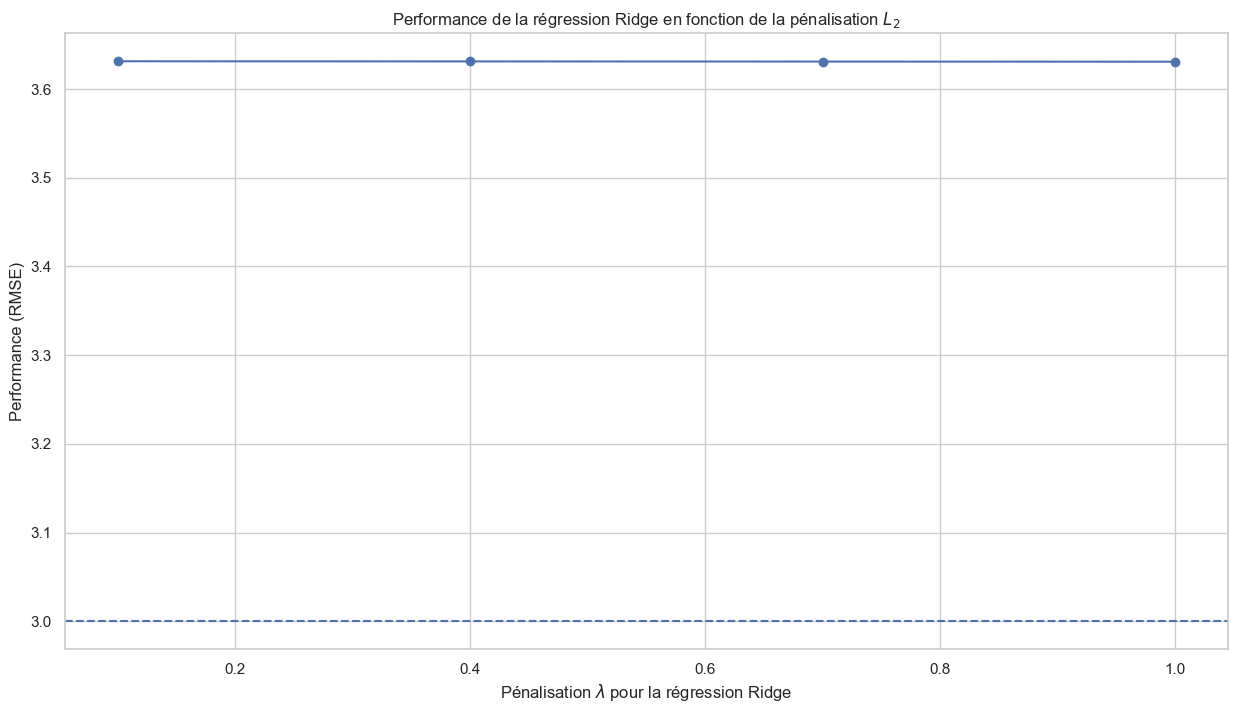

In [ ]:
from sklearn.linear_model import Ridge

alpha_grid = np.linspace(0.001, 1, 40)
score_result = []
for alpha in alpha_grid:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, scoring=make_scorer(RMSE), cv=10)
    score_result.append(scores.mean())


plt.figure(figsize=(15, 8))
plt.plot(alpha_grid, score_result, 'o-')
plt.axhline(y=3, ls='--')
plt.xlabel(r"Pénalisation $\lambda$ pour la régression Ridge")
plt.ylabel("Performance (RMSE)")
plt.title(r"Performance de la régression Ridge en fonction de la pénalisation $L_2$")
plt.show()

123